<center> <h1>Numerical Methods  -- Final Project</h1> </center>

## Part I -- Hernquist potential

In [1]:
#Finding the apocenter and pericenter of the orbit
from scipy.optimize import newton
import numpy as np
%config InlineBackend.figure_format = 'retina' 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show

#Hernquist profile
def H(x):
    rs = 10.
    M = 5e11
    G = 4.302e-6
    r = np.sqrt(x[0]**2+x[1]**2+x[2]**2)
    return -G*M/(r+rs)

def Hernquist(r):
    rs = 10.
    M = 5e11
    G = 4.302e-6
    return -G*M/(r+rs)

#angular momentum, expressed as the cross product of position and velocity
def L(x, v):
    l = np.cross(x, v)  
    return l

#total energy
def E_H(x,v):
    E = 0.5*(v[0]**2+v[1]**2+v[2]**2)+H(x)
    return E
def R_H(r,energy,momentum):
    return energy - 0.5*(momentum/r)**2-Hernquist(r)

#three sets of initial conditions
x0 = np.array([[21,3,0],[2,8,40],[1,10,12]])
v0 = np.array([[0,220,0],[25,15,30],[145,32,78]])
Radius1 = np.linspace(17,27,1000)
Radius2 = np.linspace(.7,60,1000)
Radius3 = np.linspace(1,50,1000)


Momentum1 = sum(L(x0[0],v0[0]))
Energy_h1 = E_H(x0[0],v0[0])
Momentum2 = sum(L(x0[1],v0[1]))
Energy_h2 = E_H(x0[1],v0[1])
Momentum3 = sum(L(x0[2],v0[2]))
Energy_h3 = E_H(x0[2],v0[2])

R_h1 = R_H(Radius1,Energy_h1,Momentum1)
R_h2 = R_H(Radius2,Energy_h2,Momentum2)
R_h3 = R_H(Radius3,Energy_h3,Momentum3)

n1 = np.argmax(R_h1)
n2 = np.argmax(R_h2)
n3 = np.argmax(R_h3)

m1 = Radius1[n1]
m2 = Radius2[n2]
m3 = Radius3[n3]

fig = figure(figsize=(30,10))
frame1 = fig.add_subplot(131)
frame2 = fig.add_subplot(132)
frame3 = fig.add_subplot(133)
z1 = newton(R_H,20.,args=(Energy_h1,Momentum1))
z2 = newton(R_H,24.,args=(Energy_h1,Momentum1))
print "The pericentre and apocentre are found to be:",z1,"kpc","and",z2,"kpc","for the 1st orbit"
print "The center is:",m1
z1 = newton(R_H,.1,args=(Energy_h2,Momentum2))
z2 = newton(R_H,40.,args=(Energy_h2,Momentum2))
print "The pericentre and apocentre are found to be:",z1,"kpc","and",z2,"kpc","for the 1nd orbit"
print "The center is:",m2
z1 = newton(R_H,.1,args=(Energy_h3,Momentum3))
z2 = newton(R_H,20.,args=(Energy_h3,Momentum3))
print "The pericentre and apocentre are found to be:",z1,"kpc","and",z2,"kpc","for the 1rd orbit"
print "The center is:",m3
frame1.plot(Radius1,R_h1,ls='--',label="Hernquist",color='indigo',alpha=0.75,lw=2)
frame1.set_title(r"1st orbit, $R= E_{tot} - \frac{1}{2}\left(\frac{L}{r}\right)^2-\Phi$",fontsize=20)
frame2.plot(Radius2,R_h2,ls='--',label="Hernquist",color='indigo',alpha=0.75,lw=2)
frame2.set_title(r"2nd orbit, $R= E_{tot} - \frac{1}{2}\left(\frac{L}{r}\right)^2-\Phi$",fontsize=20)
frame3.plot(Radius3,R_h3,ls='--',label="Hernquist",color='indigo',alpha=0.75,lw=2)
frame3.set_title(r"3rd orbit, $R= E_{tot} - \frac{1}{2}\left(\frac{L}{r}\right)^2-\Phi$",fontsize=20)
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)
frame1.axhline(y=0,color='#b22222',lw=3)
frame2.axhline(y=0,color='#b22222',lw=3)
frame3.axhline(y=0,color='#b22222',lw=3)
frame1.axvline(x=m1,color='salmon',lw=3)
frame2.axvline(x=m2,color='salmon',lw=3)
frame3.axvline(x=m3,color='salmon',lw=3)
show()
    

SyntaxError: Missing parentheses in call to 'print'. Did you mean print("The pericentre and apocentre are found to be:",z1,"kpc","and",z2,"kpc","for the 1st orbit")? (<ipython-input-1-2b8dc454955f>, line 67)

In [5]:
import numpy as np
from math import *

G = 4.302e-6 #kpc Msun^-1 (km/s)^2  
M = 5e11
b = 10

def F(x,r): #acceleration of Plummer profile  dv/dt = F(x)
    b = 10   #function needed for the LF-algorithm
    a = G*M*x/(r**2+b**2)**1.5
    return -a

def Fh(x,r): #hernquist acceleration for leapforg method
    b = 10   #which is used as the default acceleration in the LF-algorithm
    a = G*M/(r+b)**2 *(x/r)
    return -a

#kinetic energy, in terms of velocity
def Ek(V):
    Vx = V[:,0]
    Vy = V[:,1]
    Vz = V[:,2]
    return 1/2.*(Vx**2+Vy**2+Vz**2)

#Hernquist potential
def Hernquist(r):
    rs = 10.
    M = 5e11
    G = 4.302e-6
    return -G*M/(r+rs)

#Plummer potential
def Plummer(r):
    return -G * M/np.sqrt((r**2 + b**2))

def Etot(V,r):
    return Hernquist(r)+Ek(V)

#angular momentum, expressed as the cross product of position and velocity
def L(x, v):
    l = np.cross(x, v)  
    return l

#lepfrog algorithm

def leapfrog(x0, v0, tn=2., dt=1e-3):
    #initial conditions
    x0_x = x0[0]
    x0_y = x0[1]
    x0_z = x0[2]
    v0_x = v0[0]
    v0_y = v0[1]
    v0_z = v0[2]
    t = 0

    r1 = (x0_x**2+x0_y**2+x0_z**2)**0.5
    #v1/2_x,v1/2_y,v1/2_z
    v1mid = v0_x + 0.5*dt*Fh(x0_x,r1) #find corresponding mid point velocity
    v2mid = v0_y + 0.5*dt*Fh(x0_y,r1) #initial conditions given at the same time
    v3mid = v0_z + 0.5*dt*Fh(x0_z,r1) #needs to make a jump start
    
    position = np.array([[x0_x,x0_y,x0_z]])
    velocity_mid = np.array([[v1mid,v2mid,v3mid]])
    velocity = np.array([[v0_x,v0_y,v0_z]])

    radius = np.array([r1])
    time = np.array([0])

    L = np.array([])
    Energy = np.array([])

    x1 = x0_x
    x2 = x0_y
    x3 = x0_z
    while t<= tn: #leap frog method
        x1 = x1 + v1mid*dt
        x2 = x2 + v2mid*dt
        x3 = x3 + v3mid*dt

        r = (x1**2+x2**2+x3**2)**0.5

        a1 = Fh(x1,r)
        a2 = Fh(x2,r)
        a3 = Fh(x3,r)

        vxx = v1mid + 0.5*dt*a1
        vyy = v2mid + 0.5*dt*a2
        vzz = v3mid + 0.5*dt*a3

        v1mid = v1mid + dt*a1
        v2mid = v2mid + dt*a2
        v3mid = v3mid + dt*a3

        t = t + dt
        
        position = np.append(position,[[x1,x2,x3]],axis=0)
        velocity = np.append(velocity,[[vxx,vyy,vzz]],axis=0)
    
        radius = np.append(radius,r)
        time = np.append(time,t)
    
    return position, velocity, radius, time


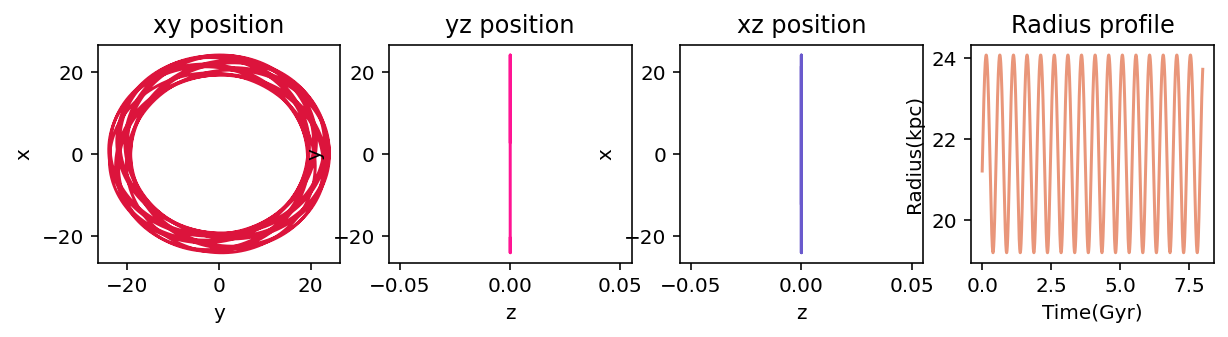

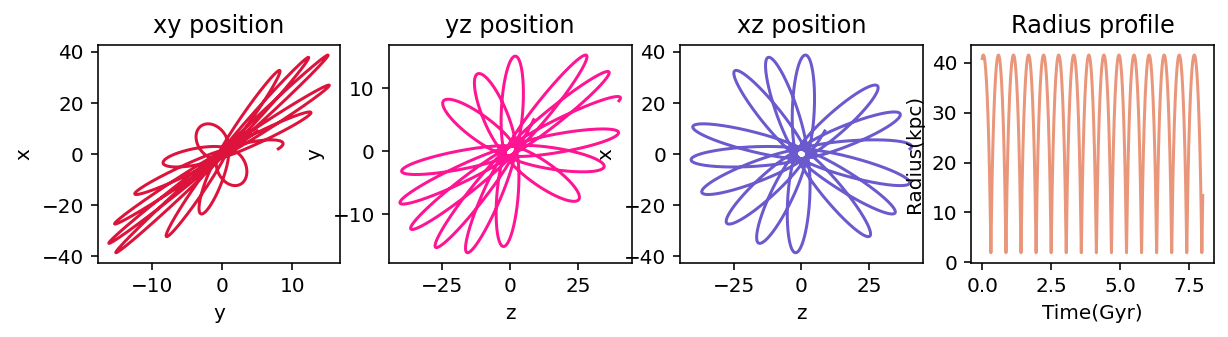

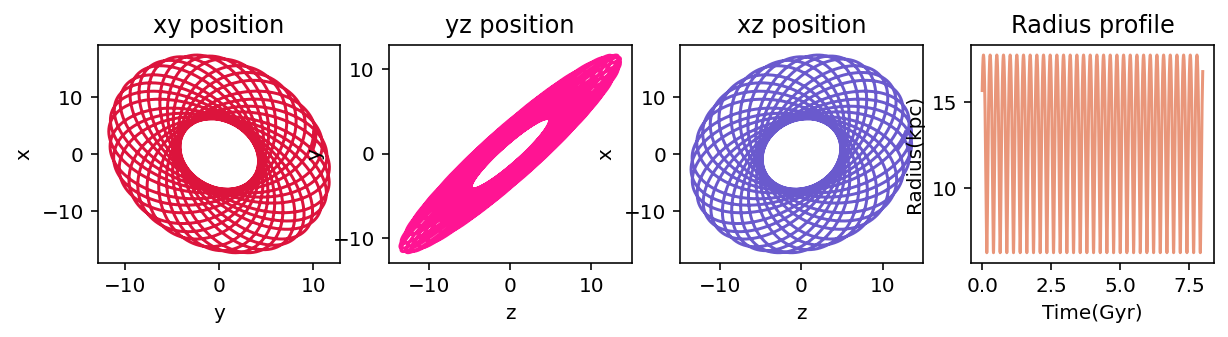

In [6]:
%config InlineBackend.figure_format = 'retina' 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show

#three sets of initial conditions
x0 = np.array([[21,3,0],[2,8,0],[1,10,0]])
v0 = np.array([[0,220,0],[25,15,30],[145,32,78]])

i = 0
while i<len(x0):
    X,V,R,T = leapfrog(x0[i],v0[i],tn=8.)
    x = X[:,0]
    y = X[:,1]
    z = X[:,2]
    fig = figure(figsize=(10,2))
    frame1 = fig.add_subplot(141)
    frame2 = fig.add_subplot(142)
    frame3 = fig.add_subplot(143)
    frame4 = fig.add_subplot(144)
    frame1.plot(y,x,'-',color='crimson')
    frame1.set_xlabel('y')
    frame1.set_ylabel('x')
    frame1.set_title('xy position')
    frame2.plot(z,y,'-',color='deeppink')
    frame2.set_xlabel('z')
    frame2.set_ylabel('y')
    frame2.set_title('yz position')
    frame3.plot(z,x,'-',color='slateblue')
    frame3.set_xlabel('z')
    frame3.set_ylabel('x')
    frame3.set_title('xz position')
    frame4.plot(T,R,'-',color='darksalmon') 
    frame4.set_xlabel('Time(Gyr)')
    frame4.set_ylabel('Radius(kpc)')
    frame4.set_title('Radius profile')
    show()
    i+=1



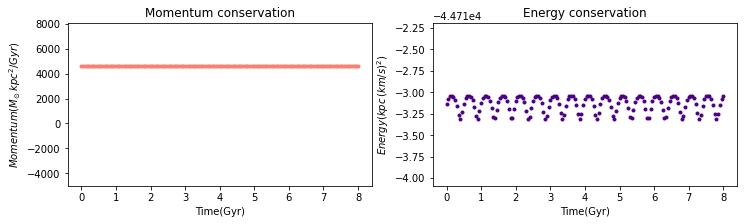

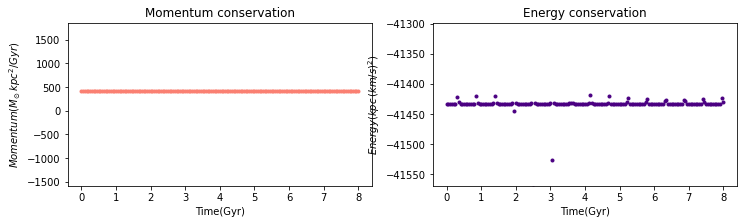

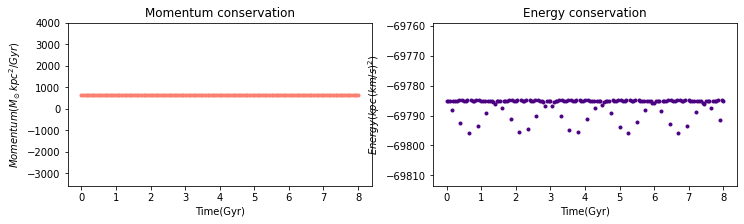

In [4]:
#check angular momentum and energy
i = 0
N = 50
while i<len(x0):
    X,V,R,T = leapfrog(x0[i],v0[i],tn=8.)
    X = X[0::N]
    V = V[0::N]
    R = R[0::N]
    T = T[0::N]
    Momentum = L(X,V)
    Energy = Etot(V,R)
    Ltot = np.array([])
    for l in Momentum:
        Ltot = np.append(Ltot,sum(l))
    mm = Momentum.mean()
    mstd = Momentum.std()
    em = Energy.mean()
    estd = Energy.std()
    fig = figure(figsize=(12,3))
    frame1 = fig.add_subplot(121)
    frame2 = fig.add_subplot(122)
    frame1.plot(T,Ltot,'.',color='salmon')
    frame1.set_ylim(mm-3*mstd,mm+3*mstd)
    frame1.set_xlabel('Time(Gyr)')
    frame1.set_ylabel(r'$Momentum(M_{\odot} \,kpc^2 / Gyr)$')
    frame1.set_title('Momentum conservation')
    frame2.plot(T,Energy,'.',color='indigo')
    frame2.set_ylim(em-10*estd,em+10*estd)
    frame2.set_xlabel('Time(Gyr)')
    frame2.set_ylabel(r'$Energy(kpc \,(km/s)^2)$')
    frame2.set_title('Energy conservation')
    show()
    i+=1




## Part II -- Satellite Galaxy

In [5]:
import numpy as np


b = .3 #initial condition,in kpc
M = 1e8
N = 10000 #number of particles
G = 4.302e-6 #kpc Msun^-1 (km/s)^2  
#use rejection sampling to generate velocity
def Plummer(r):
    return -G * M/np.sqrt((r**2 + b**2))

def vesc(r):
    return np.sqrt(-2*Plummer(r))

R = np.array([])
Mass = np.array([])
i = 0
while i < N:
    m = np.random.uniform(0.,1.) #mass ratio, m/M
    r = b / np.sqrt( (m)**(-2.0 / 3) - 1)
    if r < 10*b:
        Mass = np.append(Mass,m)
        R = np.append(R,r)
        i+=1

Theta = np.arccos( np.random.uniform(-1,1,N) )
Phi =  np.random.uniform(0, 2*np.pi,N)

Vx = np.array([])
Vy = np.array([])
Vz = np.array([])

a = 0
while a<N:
    vx = np.random.normal(15,3)
    vy = np.random.normal(15,3)
    vz = np.random.normal(15,3)
    v = np.sqrt(vx*vx+vy*vy+vz*vz)
    if v - vesc(R[a])<0:
        Vx = np.append(Vx,vx)
        Vy = np.append(Vy,vy)
        Vz = np.append(Vz,vz)
        a+=1
            

In [6]:

@np.vectorize
def coordinate(R,Theta,Phi):  #coordinate transformation
    X = R * np.sin(Theta) * np.cos(Phi)
    Y = R * np.sin(Theta) * np.sin(Phi)
    Z = R * np.cos(Theta)
    return X,Y,Z

X,Y,Z = coordinate(R,Theta,Phi)


In [7]:
print "The total mass fraction is:",np.sum(Mass)
print "The total mass of N particles is: %e" %(np.sum(Mass)*M)+' Msun' 

The total mass fraction is: 5019.51917504
The total mass of N particles is: 5.019519e+11 Msun


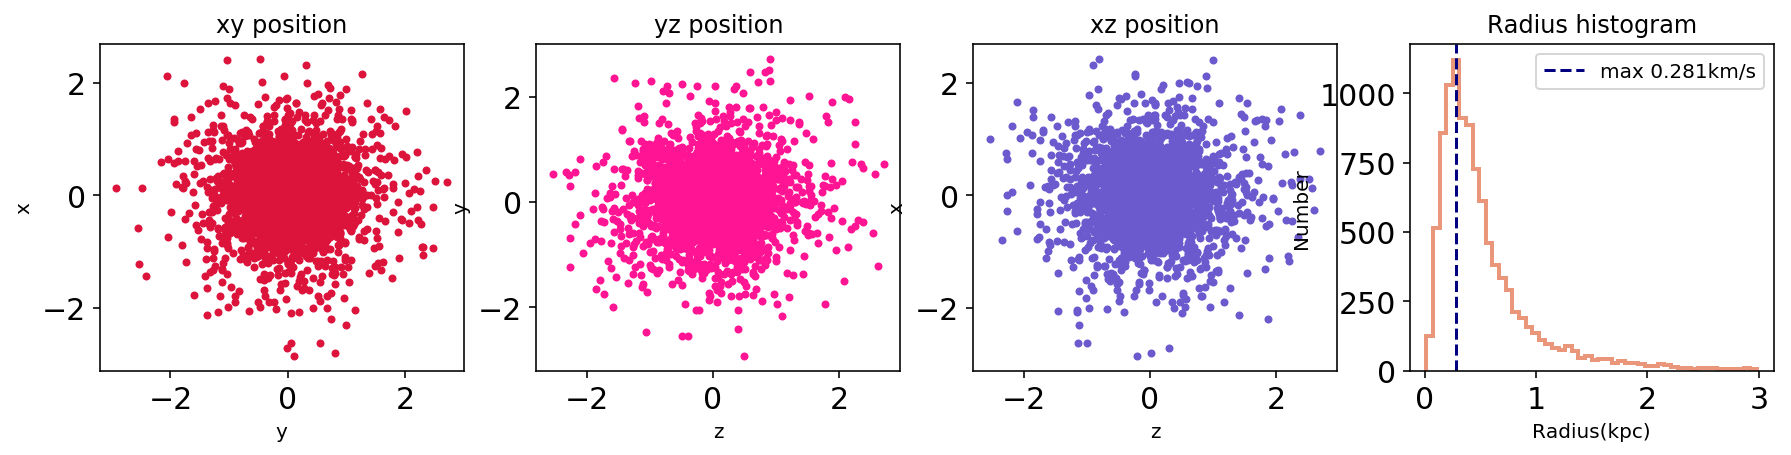

In [8]:
%config InlineBackend.figure_format = 'retina' 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show

#find a rough estimate of the maximum likelihood in histogram
binnum = 50
val, edges = np.histogram(R,bins=binnum)
bin_val = np.array([])
for i in range(binnum):
    bin_val = np.append(0.5*(edges[i]+edges[i+1]),bin_val)
ind = np.argmax(val)
r_max = round(bin_val[-ind-1],3)
fig = figure(figsize=(15,3))
frame1 = fig.add_subplot(141)
frame2 = fig.add_subplot(142)
frame3 = fig.add_subplot(143)
frame4 = fig.add_subplot(144)
frame1.plot(Y,X,'.',color='crimson')
frame1.set_xlabel('y')
frame1.set_ylabel('x')
frame1.set_title('xy position')
frame2.plot(Z,Y,'.',color='deeppink')
frame2.set_xlabel('z')
frame2.set_ylabel('y')
frame2.set_title('yz position')
frame3.plot(Z,X,'.',color='slateblue')
frame3.set_xlabel('z')
frame3.set_ylabel('x')
frame3.set_title('xz position')
frame4.hist(R,color='darksalmon',bins=50,histtype='step',lw=2)
frame4.axvline(x = r_max,ls='--',color='navy',label='max '+str(r_max)+'km/s')
frame4.set_xlabel('Radius(kpc)')
frame4.set_ylabel('Number')
frame4.set_title('Radius histogram')
frame4.legend()
show()

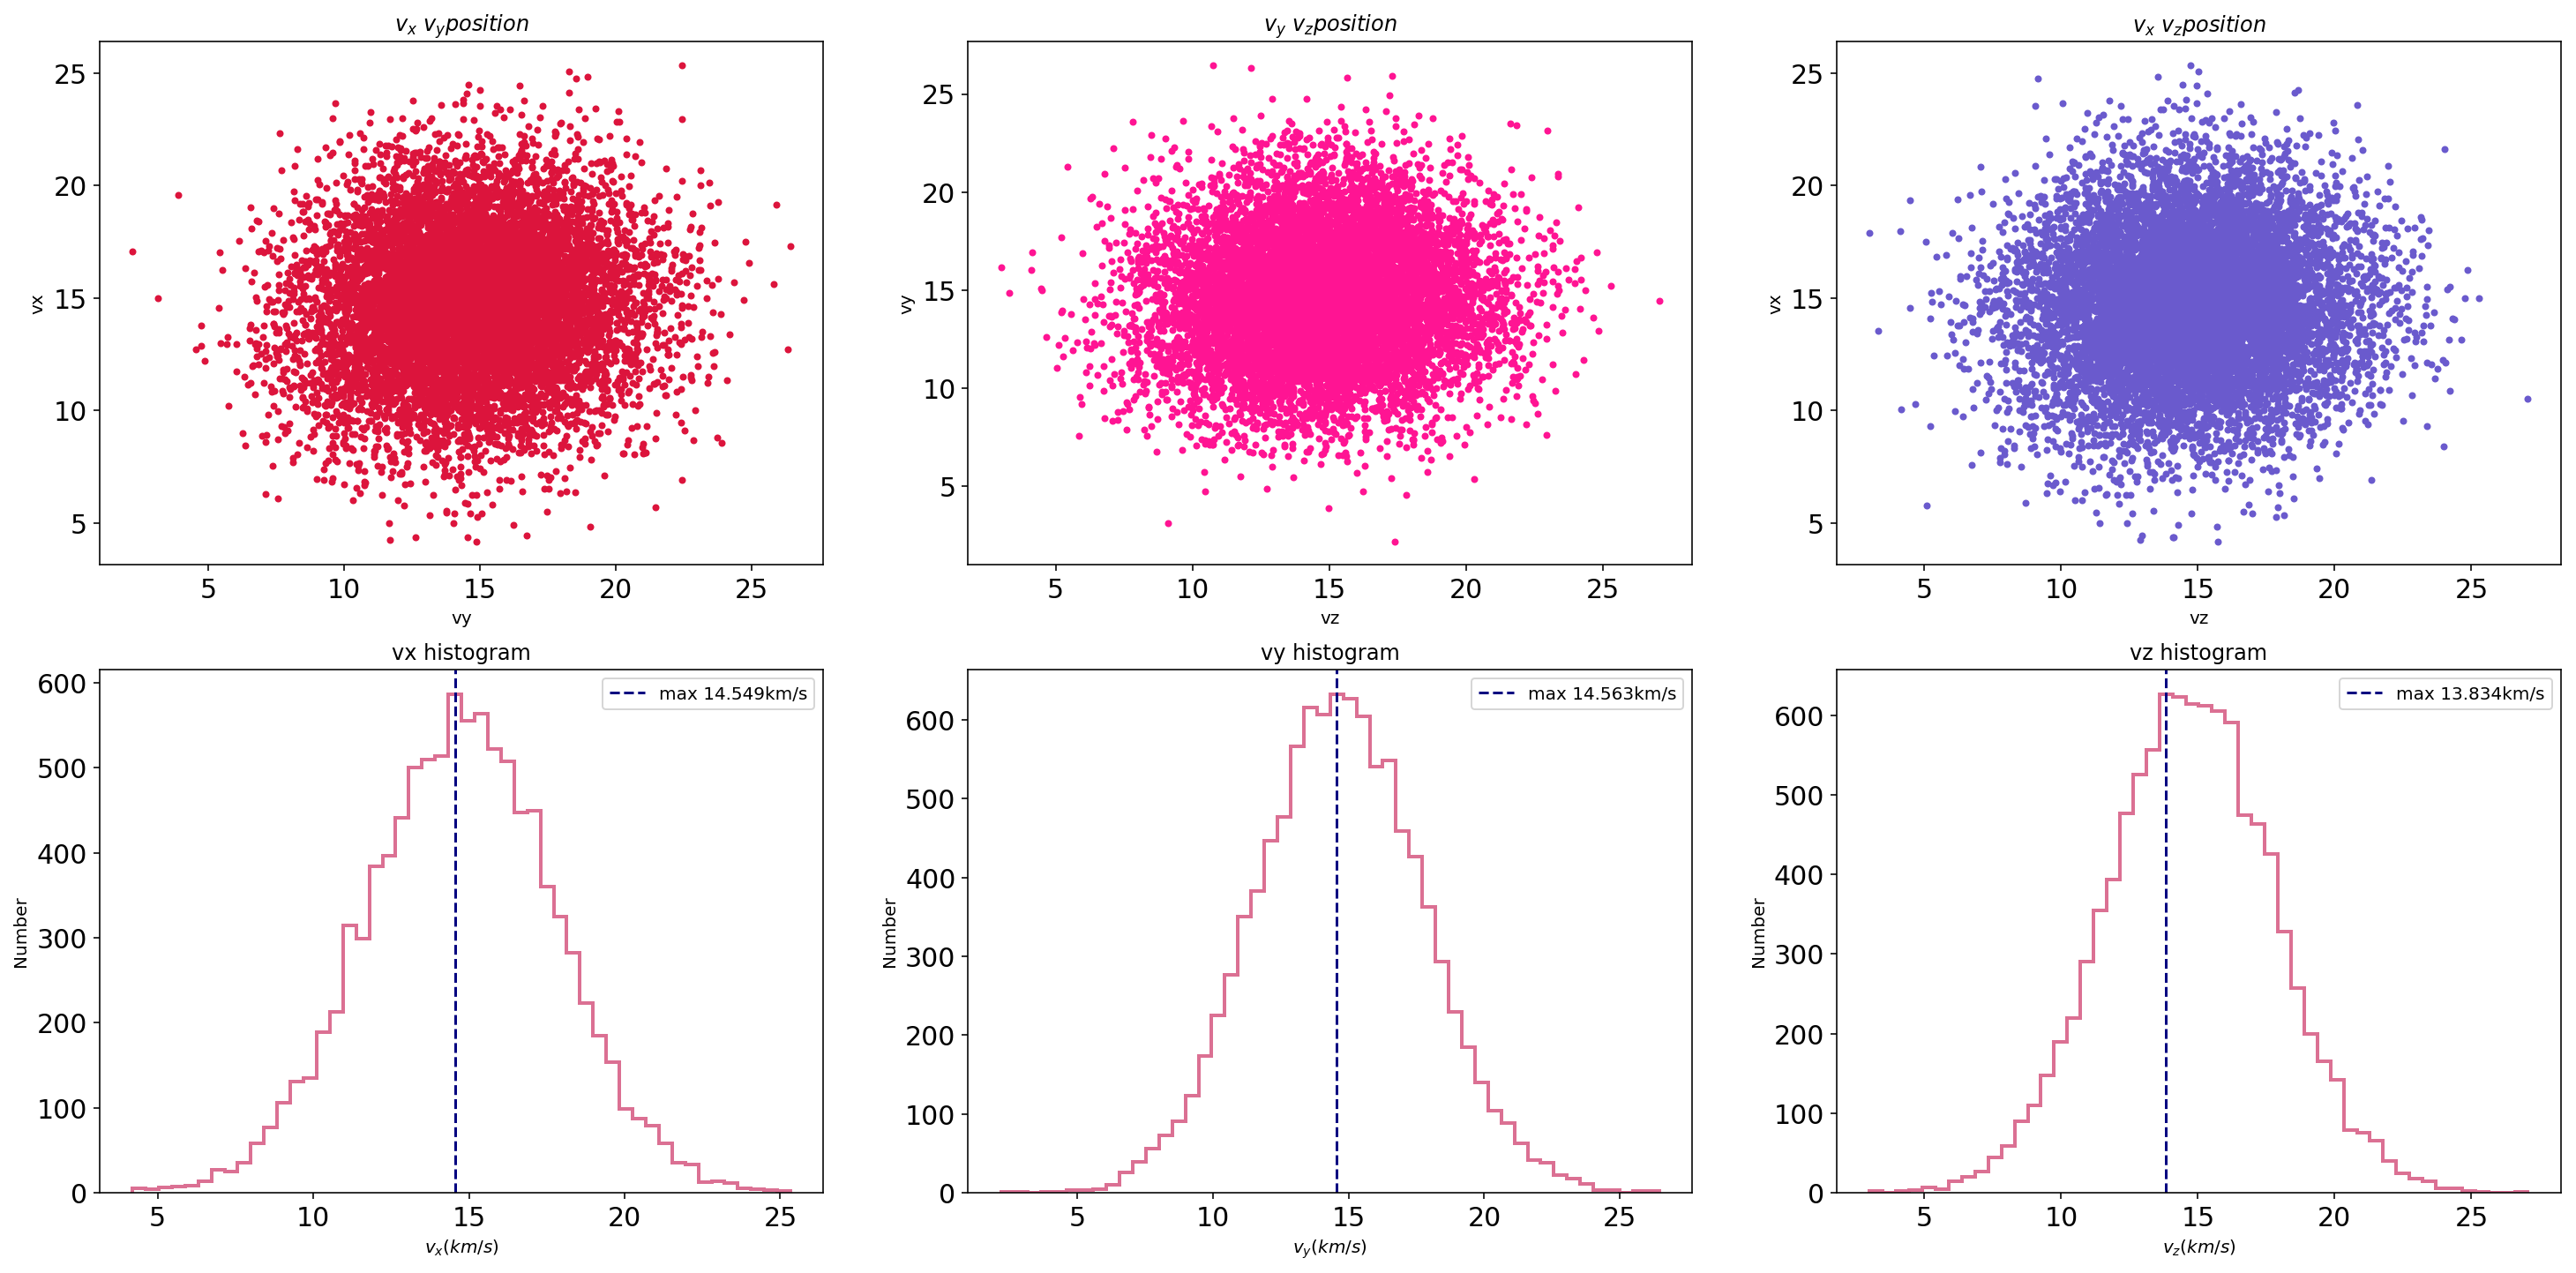

In [9]:
%config InlineBackend.figure_format = 'retina' 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show

#find a rough estimate of the maximum likelihood in histogram
def maxi(V,binnum=50):
    val, edges = np.histogram(V,bins=binnum)
    bin_val = np.array([])
    for i in range(binnum):
        bin_val = np.append(0.5*(edges[i]+edges[i+1]),bin_val)
    ind = int(np.argmax(val))
    v_max = bin_val[-ind-1]
    return round(v_max,3)

vx_max = maxi(Vx)
vy_max = maxi(Vy)
vz_max = maxi(Vz)

fig = figure(figsize=(25,12))
frame1 = fig.add_subplot(231)
frame2 = fig.add_subplot(232)
frame3 = fig.add_subplot(233)
frame4 = fig.add_subplot(234)
frame5 = fig.add_subplot(235)
frame6 = fig.add_subplot(236)
frame1.plot(Vy,Vx,'.',color='crimson')
frame1.set_xlabel('vy')
frame1.set_ylabel('vx')
frame1.set_title(r'$v_x \ v_y position$')
frame2.plot(Vz,Vy,'.',color='deeppink')
frame2.set_xlabel('vz')
frame2.set_ylabel('vy')
frame2.set_title(r'$v_y \ v_z position$')
frame3.plot(Vz,Vx,'.',color='slateblue')
frame3.set_xlabel('vz')
frame3.set_ylabel('vx')
frame3.set_title(r'$v_x \ v_z position$')
frame4.hist(Vx,bins=50,color = 'palevioletred',histtype='step',lw=2)
frame4.axvline(x = vx_max,ls='--',color='navy',label='max '+str(vx_max)+'km/s')
frame4.set_xlabel(r'$v_x(km/s)$')
frame4.set_ylabel('Number')
frame4.set_title('vx histogram')
frame4.legend()
frame5.hist(Vy,bins=50,color = 'palevioletred',histtype='step',lw=2)
frame5.axvline(x = vy_max,ls='--',color='navy',label='max '+str(vy_max)+'km/s')
frame5.set_xlabel(r'$v_y(km/s)$')
frame5.set_ylabel('Number')
frame5.set_title('vy histogram')
frame5.legend()
frame6.hist(Vz,bins=50,color = 'palevioletred',histtype='step',lw=2)
frame6.axvline(x = vz_max,ls='--',color='navy',label='max '+str(vz_max)+'km/s')
frame6.set_xlabel(r'$v_z(km/s)$')
frame6.set_ylabel('Number')
frame6.set_title('vz histogram')
frame6.legend()
show()

## Part III -- Astronomical Porblem

In [10]:
Vi = np.array([Vx,Vy,Vz]).reshape(3,len(Vx))
Pi = np.array([X,Y,Z]).reshape(3,len(X))

In [11]:
#apply leapfrog to the Nparticle just generated
#coordinate transforation is needed from particle space to orbital space

def Nleapfrog(Pi,Vi,x0,v0,tn=2.,dt=1e-4):
    #initial conditions
    x0_x = x0[0]
    x0_y = x0[1]
    x0_z = x0[2]
    v0_x = v0[0]
    v0_y = v0[1]
    v0_z = v0[2]
    t = 0
    Pf = np.array([])
    Vf = np.array([])
    for i in range(len(Vx)): #unpacking the particles
        pos = Pi[:,i]
        vel = Vi[:,i]
        particle_x0 = pos[0]
        particle_y0 = pos[1]
        particle_z0 = pos[2]
        particle_vx0 = vel[0]
        particle_vy0 = vel[1]
        particle_vz0 = vel[2]
        #initialise the particle in the orbital coordinates
        x0_x += particle_x0
        x0_y += particle_y0
        x0_z += particle_z0
        v0_x += particle_vx0
        v0_y += particle_vx0
        v0_z += particle_vx0
        r1 = (x0_x**2+x0_y**2+x0_z**2)**0.5
        #v1/2_x,v1/2_y,v1/2_z
        v1mid = v0_x + 0.5*dt*Fh(x0_x,r1) #find corresponding mid point velocity
        v2mid = v0_y + 0.5*dt*Fh(x0_y,r1) #initial conditions given at the same time
        v3mid = v0_z + 0.5*dt*Fh(x0_z,r1) #needs to make a jump start

        position = np.array([[x0_x,x0_y,x0_z]])
        velocity_mid = np.array([[v1mid,v2mid,v3mid]])
        velocity = np.array([[v0_x,v0_y,v0_z]])

        time = np.array([0])

        x1 = x0_x
        x2 = x0_y
        x3 = x0_z
        while t<= tn: #leap frog method
            x1 = x1 + v1mid*dt
            x2 = x2 + v2mid*dt
            x3 = x3 + v3mid*dt

            r = (x1**2+x2**2+x3**2)**0.5

            a1 = Fh(x1,r)
            a2 = Fh(x2,r)
            a3 = Fh(x3,r)

            vxx = v1mid + 0.5*dt*a1
            vyy = v2mid + 0.5*dt*a2
            vzz = v3mid + 0.5*dt*a3

            v1mid = v1mid + dt*a1
            v2mid = v2mid + dt*a2
            v3mid = v3mid + dt*a3

            t = t + dt

        Pf = np.append(Pf,[x1,x2,x3])
        Vf = np.append(Vf,[vxx,vyy,vzz])

    return Pf,Vf



In [12]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

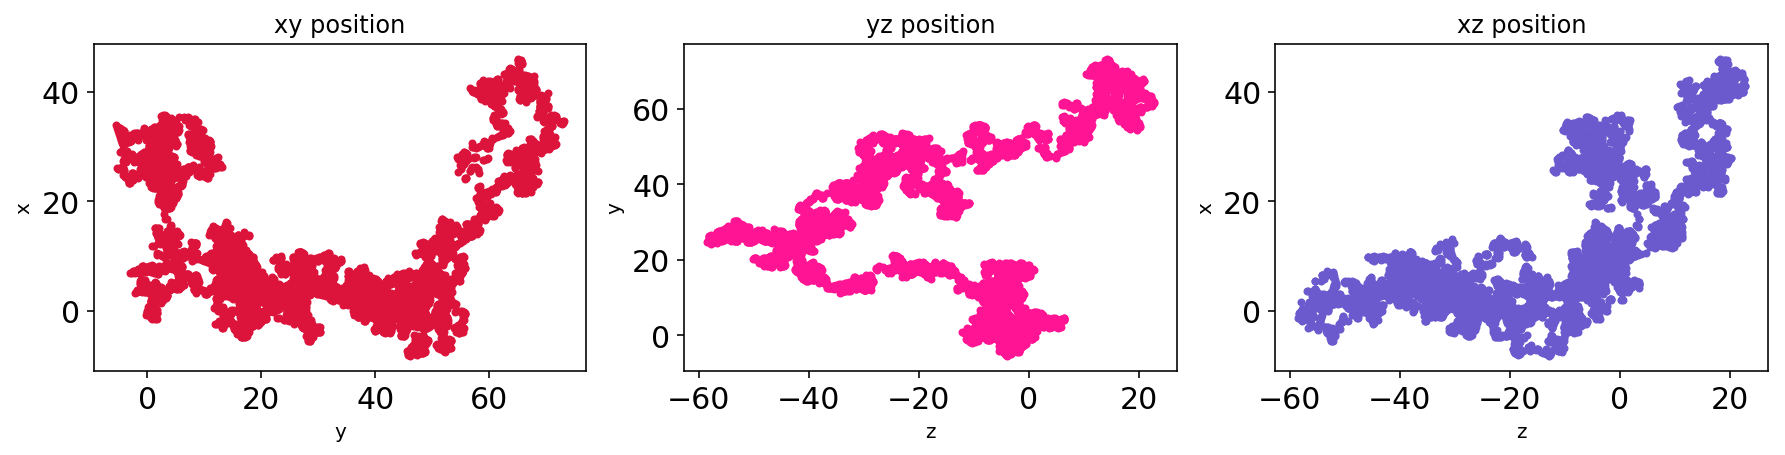

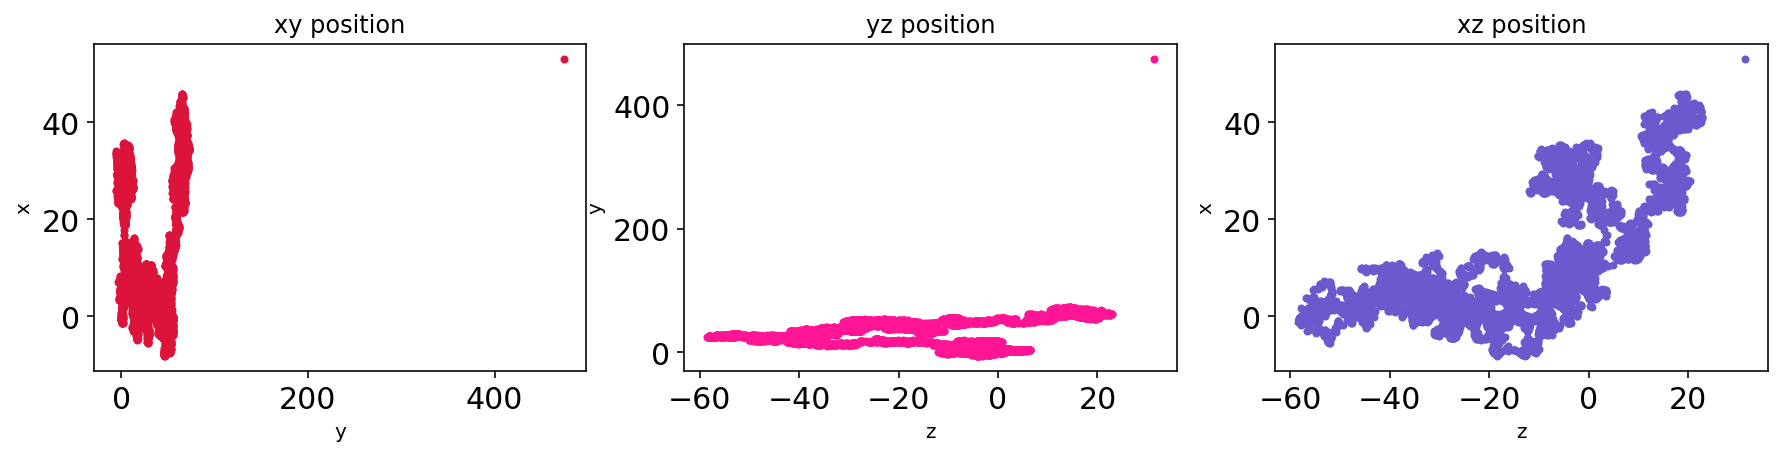

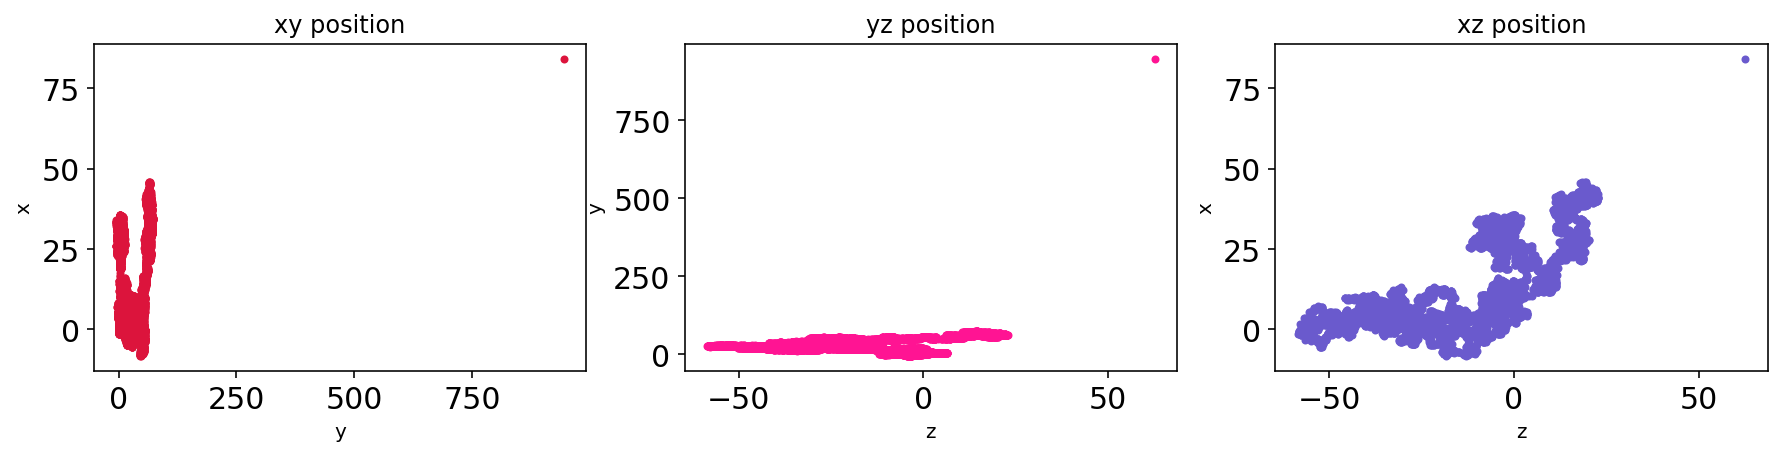

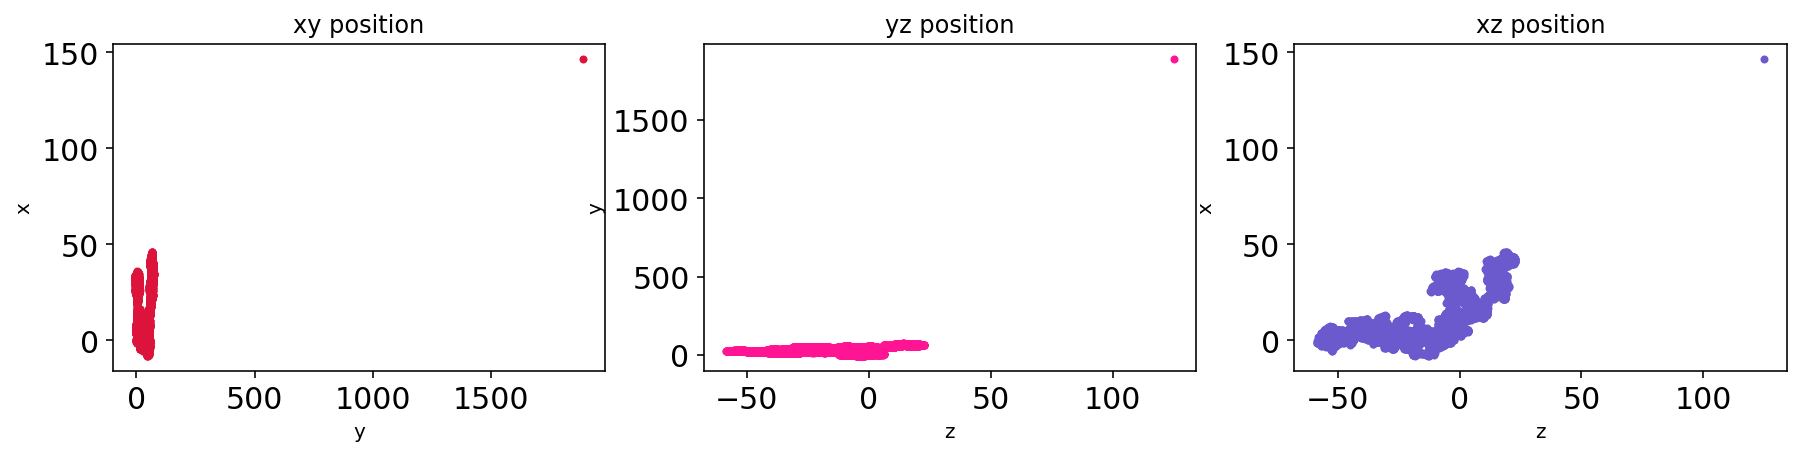

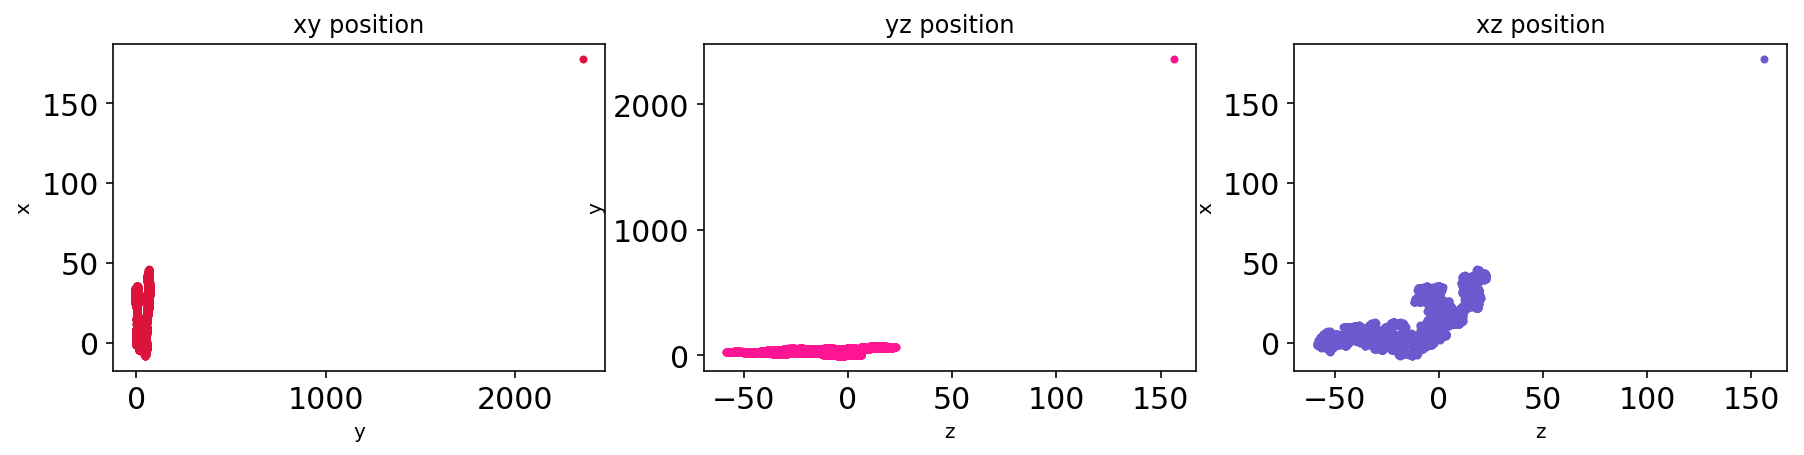

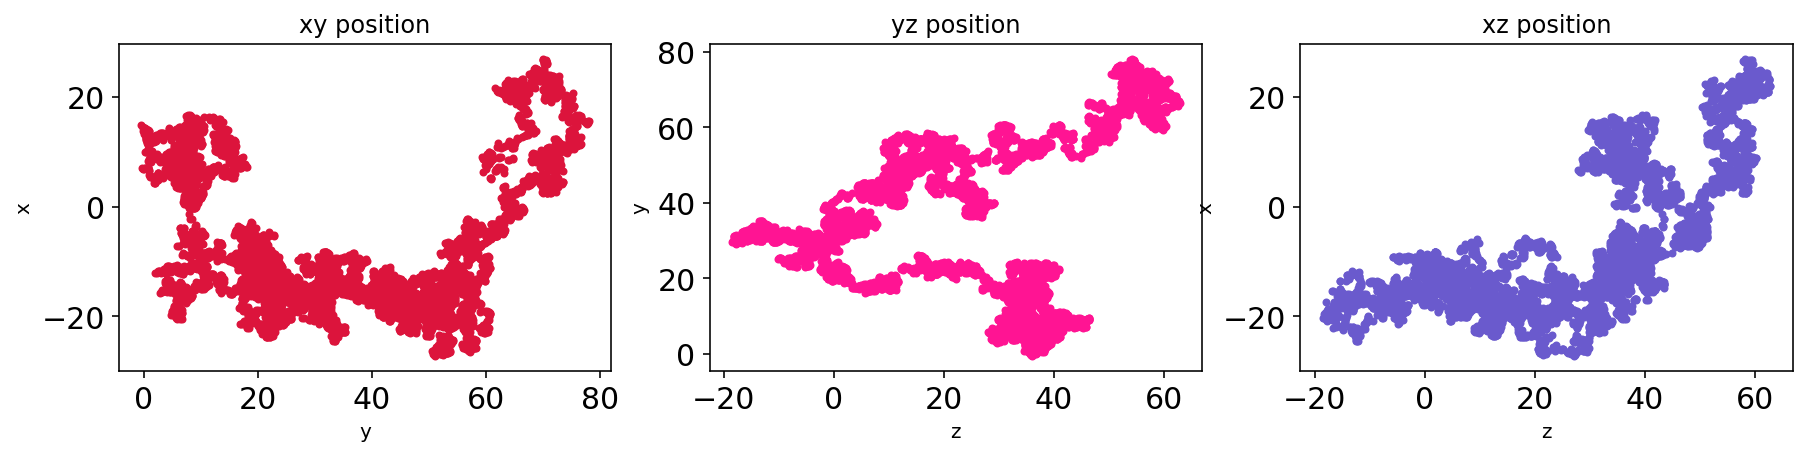

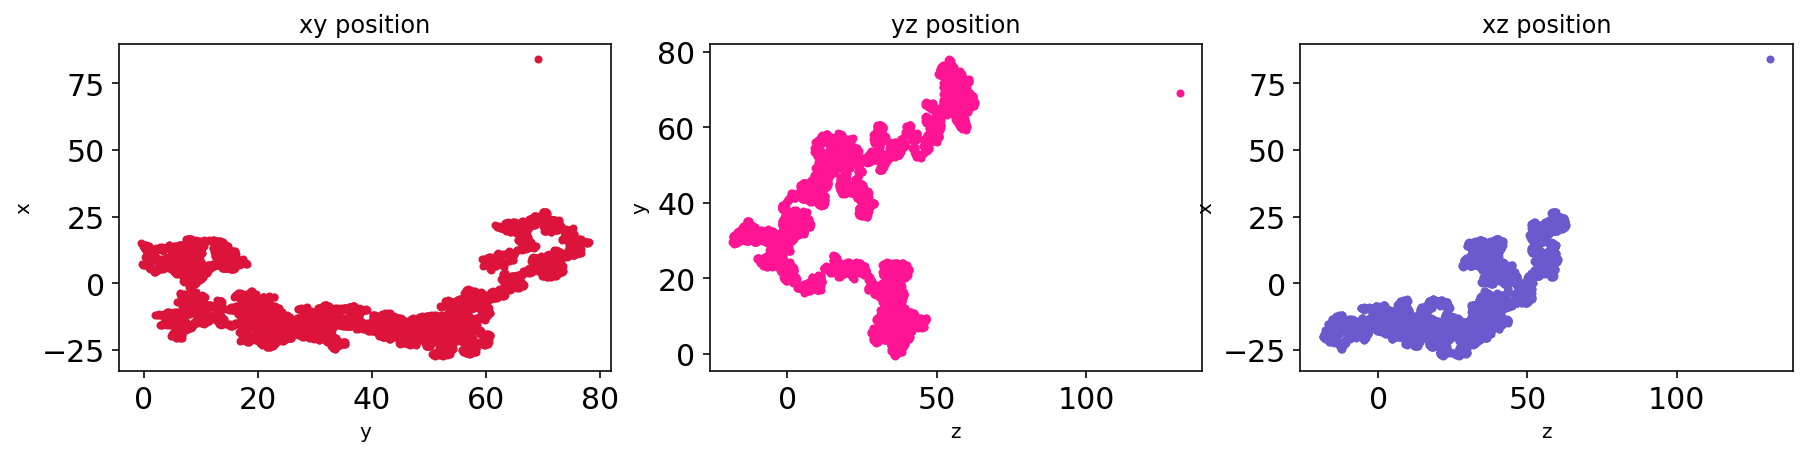

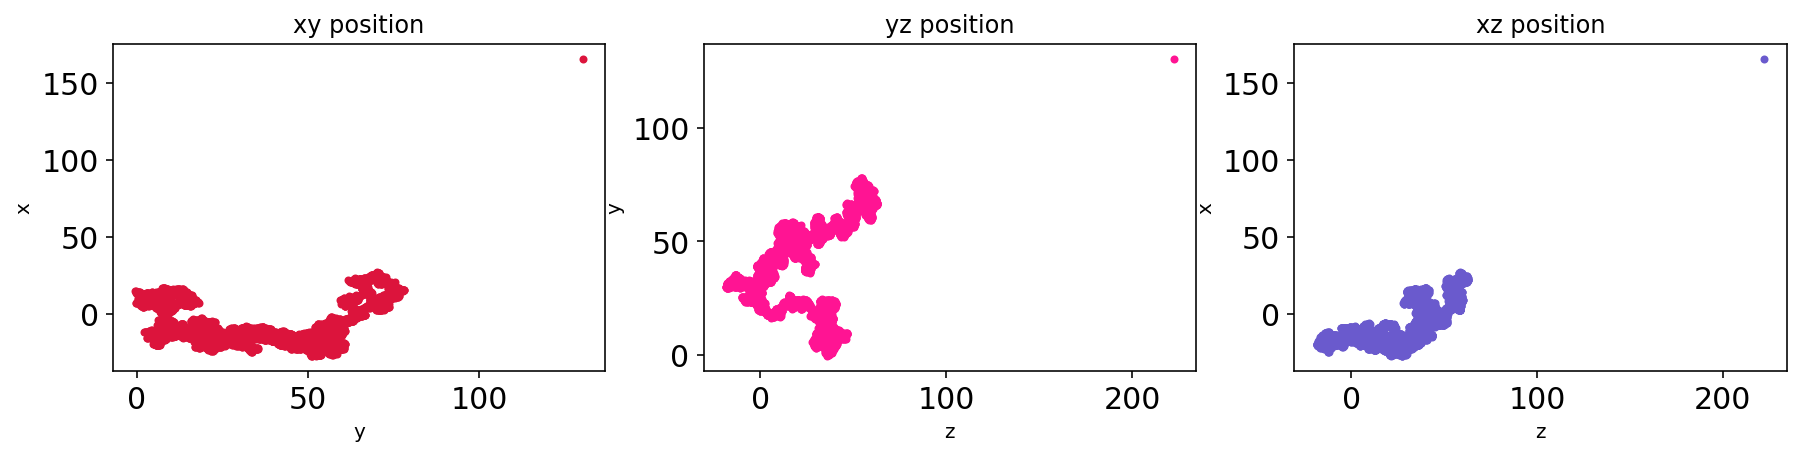

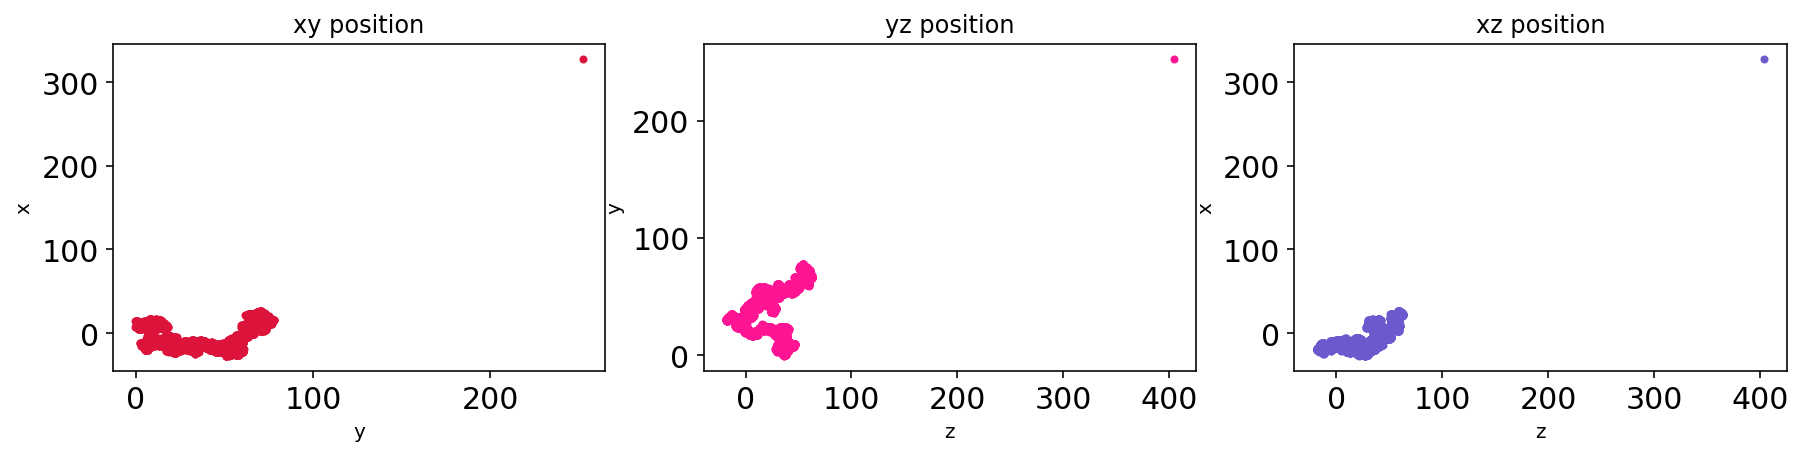

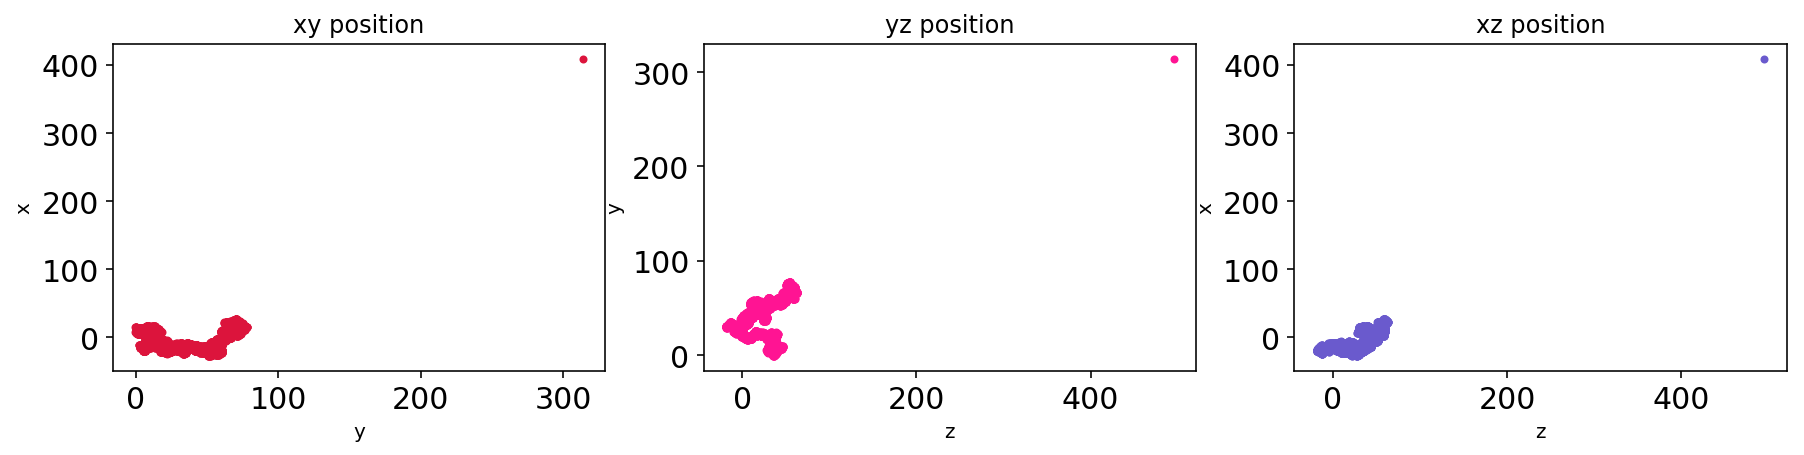

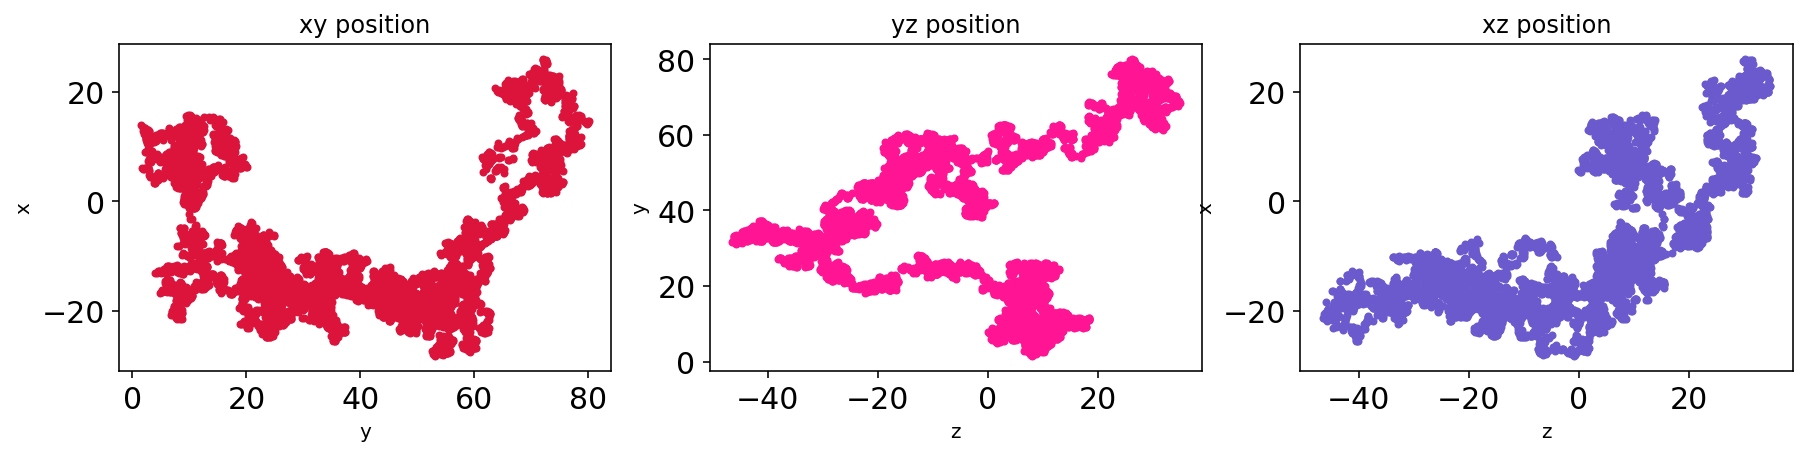

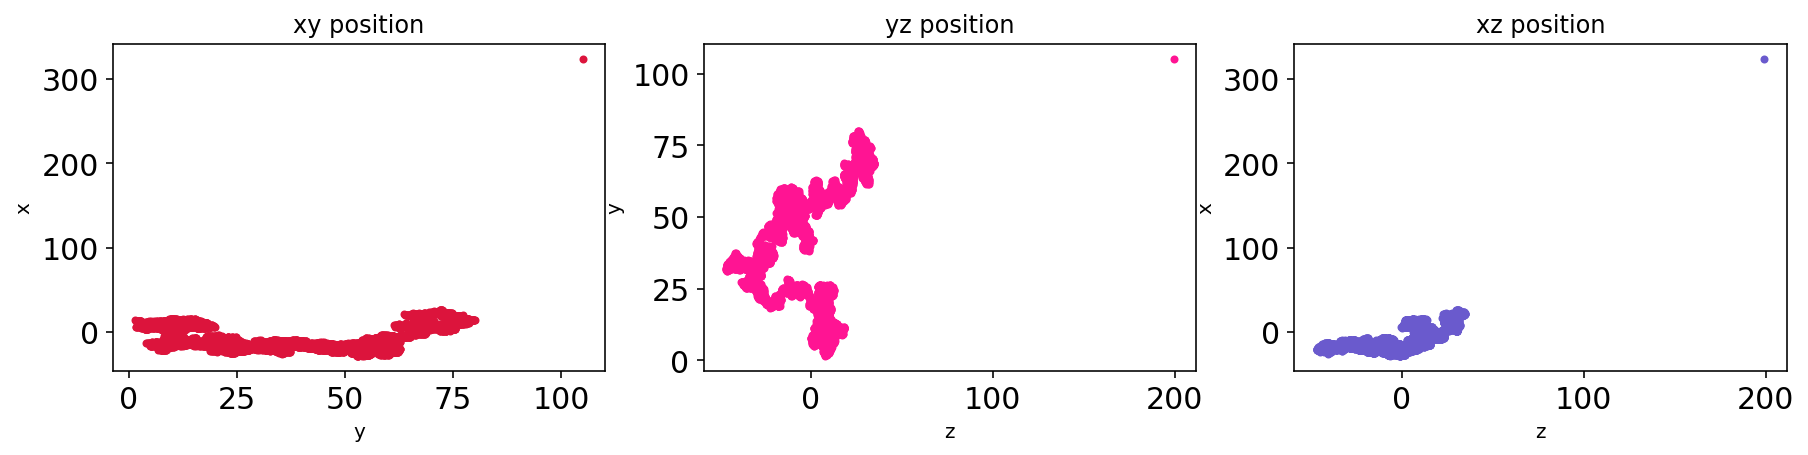

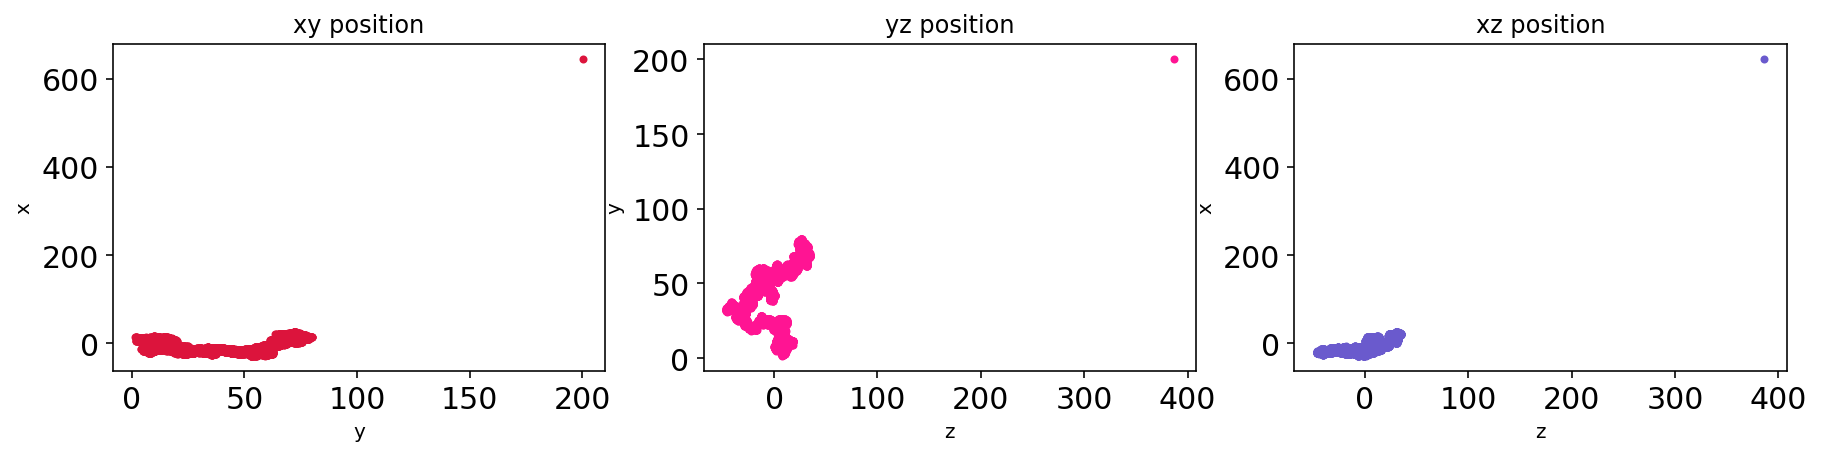

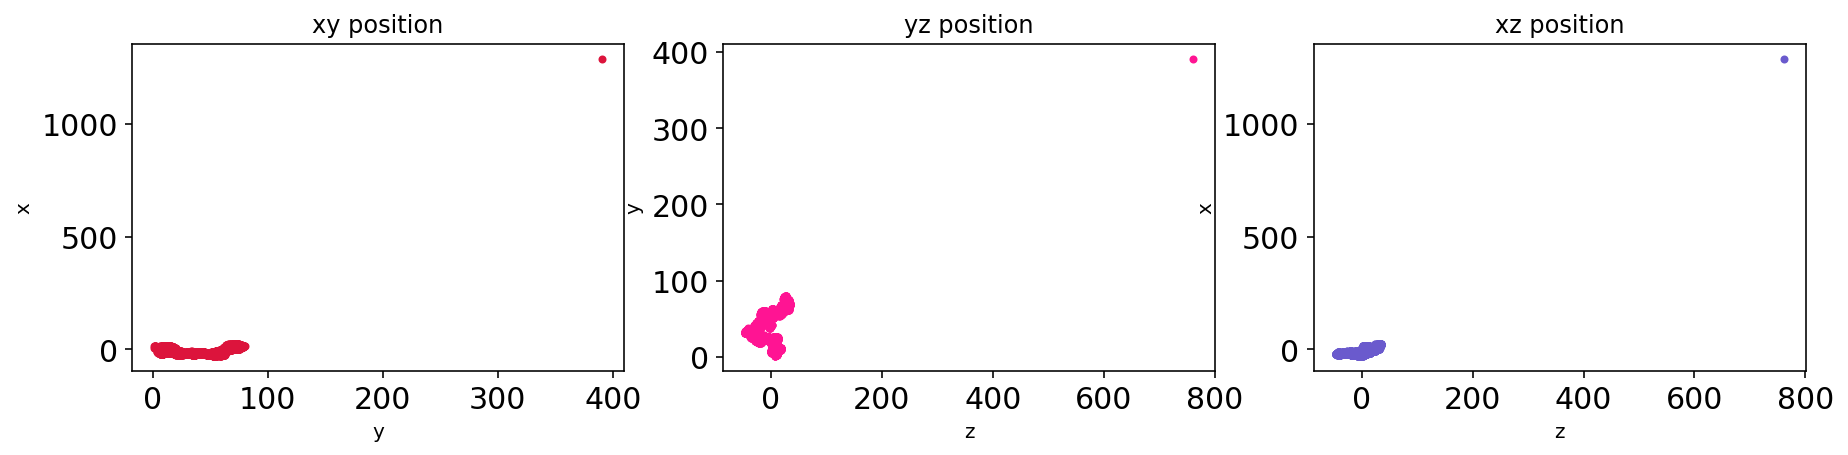

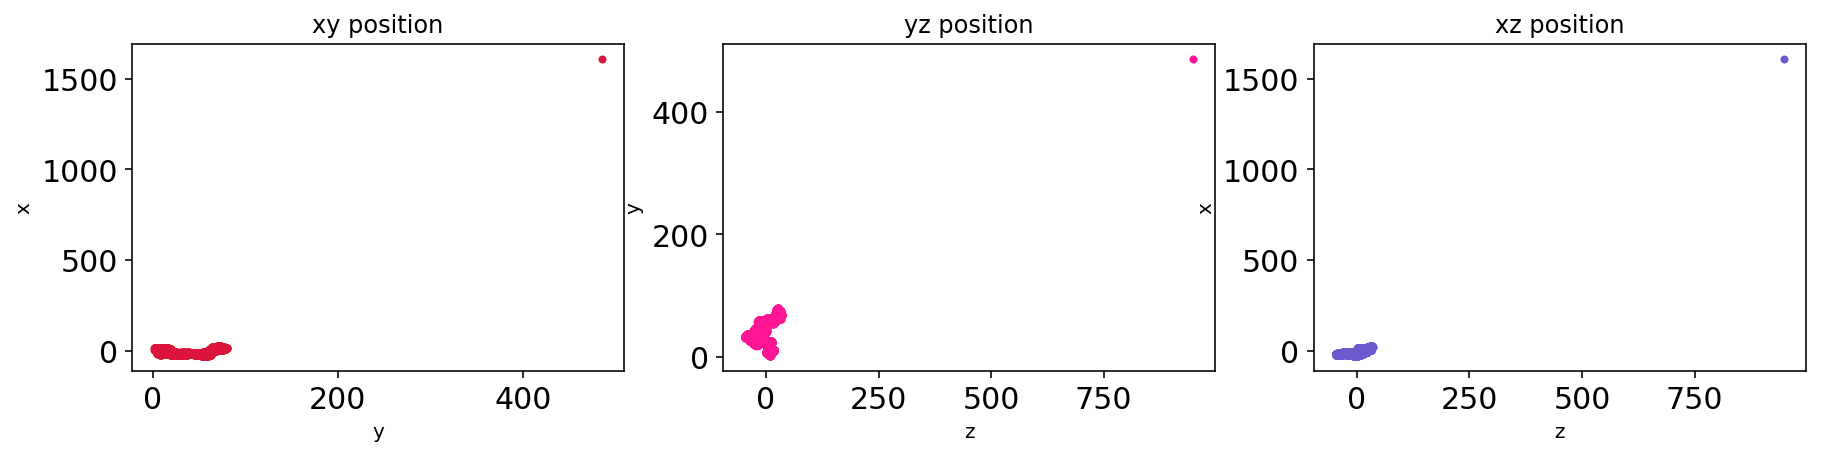

In [13]:

x0 = np.array([[21,3,0],[2,8,40],[1,10,12]])
v0 = np.array([[0,220,0],[25,15,30],[145,32,78]])
tn = np.array([0.,2.,4.,8.,10.])
for i in range(3):
    x00 = x0[i]
    v00 = v0[i]
    for j in range(5):
        tfinal = tn[j]
        Pf,Nf = Nleapfrog(Pi,Vi,x0=x00,v0=v00,tn=tfinal)

        Pf = Pf.reshape(10**4,3)
        Nf = Nf.reshape(10**4,3)

        X = Pf[:,0]
        Y = Pf[:,1]
        Z = Pf[:,2]

        fig = figure(figsize=(15,3))
        frame1 = fig.add_subplot(131)
        frame2 = fig.add_subplot(132)
        frame3 = fig.add_subplot(133)
        frame1.plot(Y,X,'.',color='crimson')
        frame1.set_xlabel('y')
        frame1.set_ylabel('x')
        frame1.set_title('xy position')
        frame2.plot(Z,Y,'.',color='deeppink')
        frame2.set_xlabel('z')
        frame2.set_ylabel('y')
        frame2.set_title('yz position')
        frame3.plot(Z,X,'.',color='slateblue')
        frame3.set_xlabel('z')
        frame3.set_ylabel('x')
        frame3.set_title('xz position')
show()        

The mass fraction within the sphere is: 0.926140064077


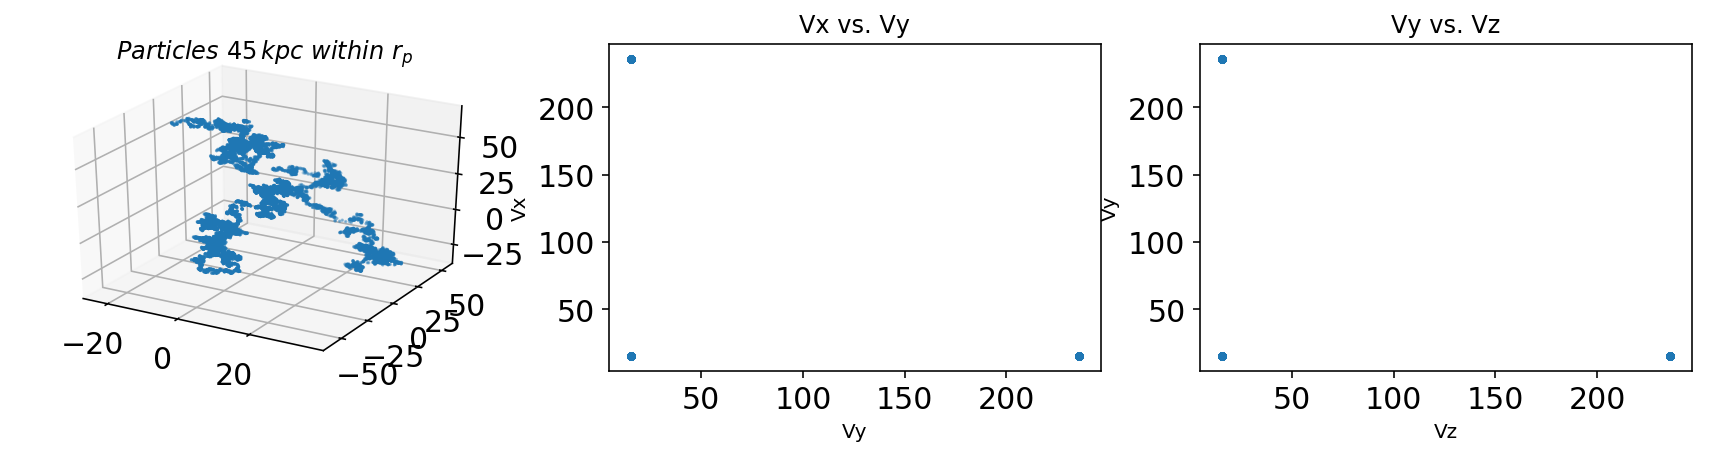

The mass fraction within the sphere is: 0.471315951695


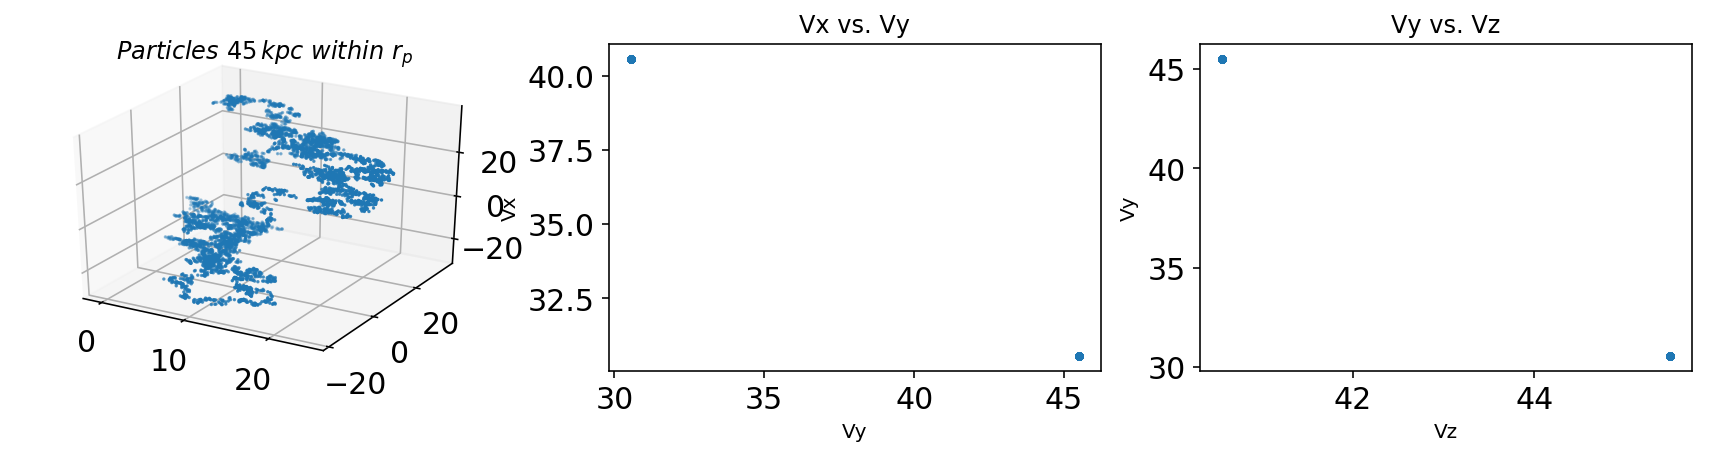

The mass fraction within the sphere is: 0.510530733974


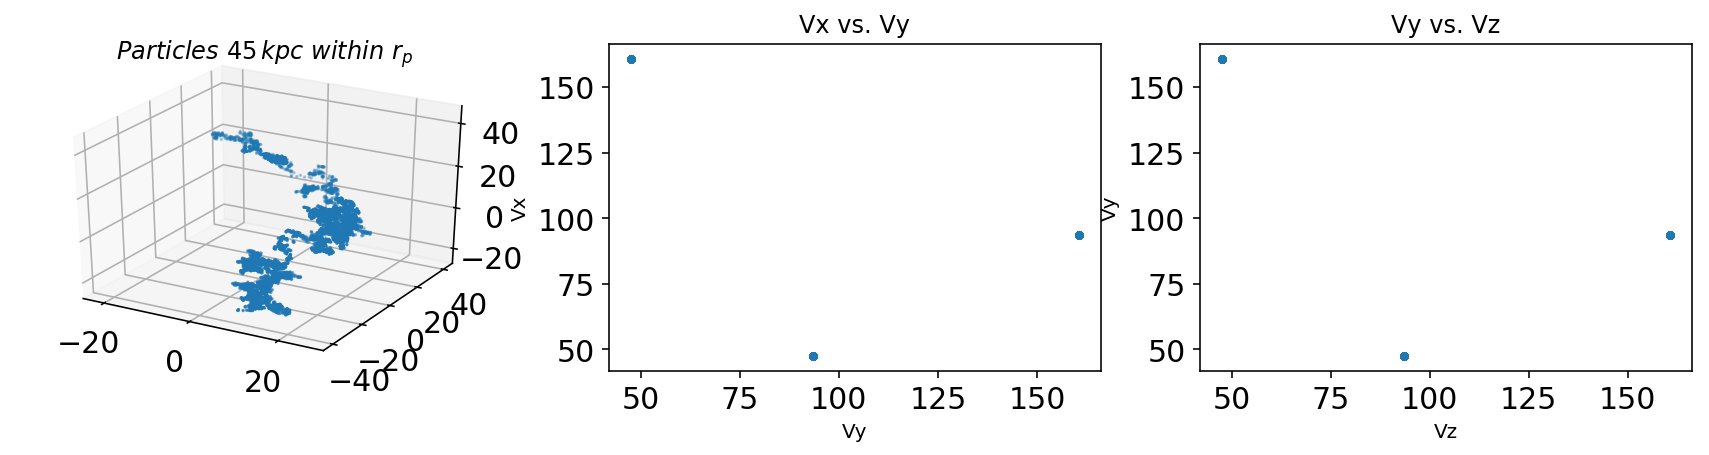

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
#select interesting locations at final time
#let's look at the pericenters and apocenters
#select a sphere of radius 10kpc, with pericenter(apocenter) the center
peri = np.array([19.198,0.727,1.304])
apo = np.array([24.073,41.855,20.612])
cent = np.array([21.374,2.303,3.207])
rs = 10.
def sphere(P,V,Mass,rad=50.,cent=0.):
    Pf = np.array([])
    Vf = np.array([])
    Mf = np.array([])
    for i in range(10**4): #unpacking the particles
        pos = P[:,i]
        vel = V[:,i]
        m = Mass[i]
        r = np.sqrt(pos[0]**2+pos[1]**2+pos[2]**2)
        if abs(r-cent) < rad:
            Pf = np.append(Pf,pos)
            Vf = np.append(Vf,vel)
            Mf = np.append(Mf,m)
    return Pf,Vf,Mf
i = 0
while i<3:
    Pf1, Vf1 = Nleapfrog(Pi,Vi,x0=x0[i],v0=v0[i],tn=tn[-1])
    Pf1 = Pf1.reshape(3,len(Vx))
    Vf1 = Vf1.reshape(3,len(Vx))
    Pff,Vff,Mf = sphere(Pf1,Vf1,Mass,rad=45.,cent=peri[i])
    l = len(Pff)/3
    Pff = Pff.reshape(l,3)
    Vff = Vff.reshape(l,3)
    #print Mf
    Mass_f = np.sum(Mf)
    X = Pff[:,0]
    Y = Pff[:,1]
    Z = Pff[:,2]
    VX = Vff[:,0]
    VY = Vff[:,1]
    VZ = Vff[:,2]
    print "The mass fraction within the sphere is:",Mass_f/np.sum(Mass)
    fig = plt.figure(figsize=(15,3))
    ax = fig.add_subplot(131, projection='3d')
    frame1 = fig.add_subplot(132)
    frame2 = fig.add_subplot(133)
    ax.scatter(X, Y, Z,marker='.',s=2)
    frame1.plot(VY,VX,'.')
    frame2.plot(VZ,VY,'.')
    ax.set_title(r"$Particles \ 45\,kpc \ within \ r_p$")
    frame1.set_title("Vx vs. Vy")
    frame1.set_xlabel("Vy")
    frame1.set_ylabel("Vx")
    frame2.set_title("Vy vs. Vz")
    frame2.set_xlabel("Vz")
    frame2.set_ylabel("Vy")
    show()              
    i+=1        
    

The mass fraction within the sphere is: 0.976004453066


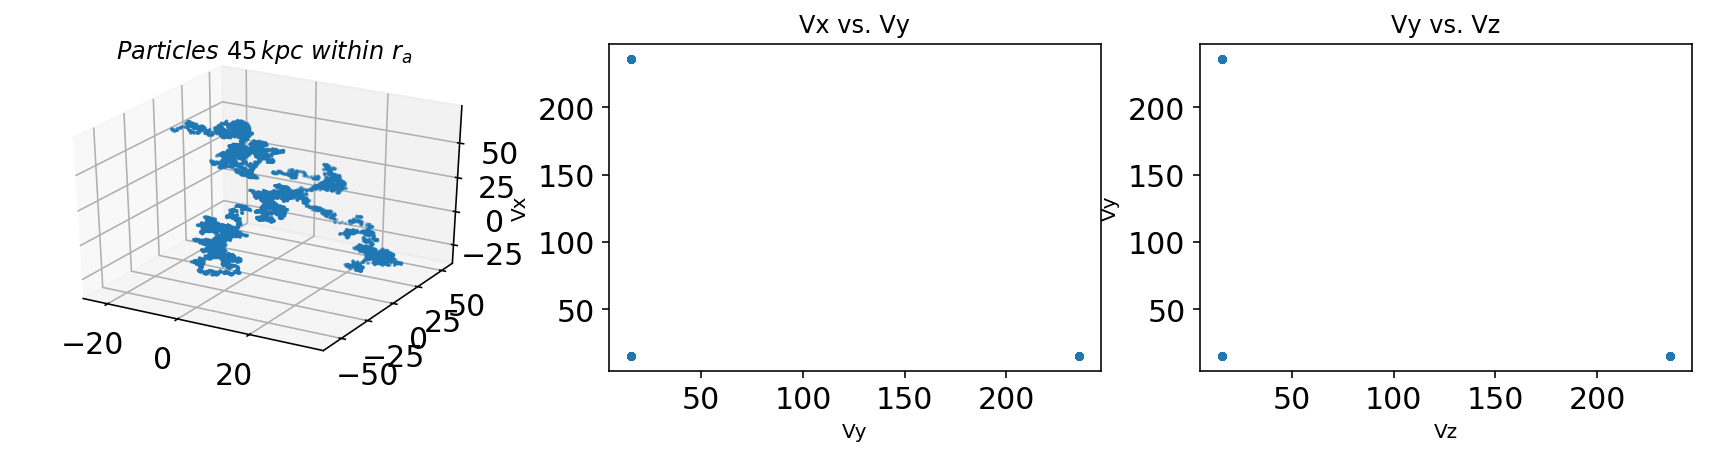

The mass fraction within the sphere is: 0.999470069965


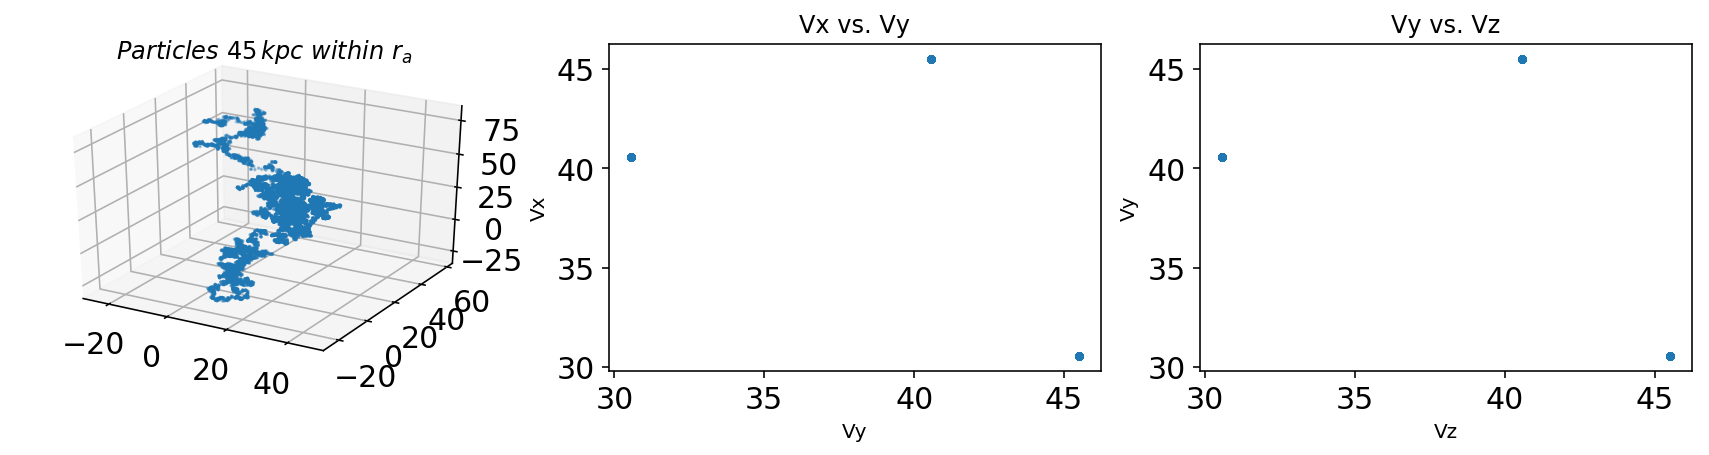

The mass fraction within the sphere is: 0.855442992416


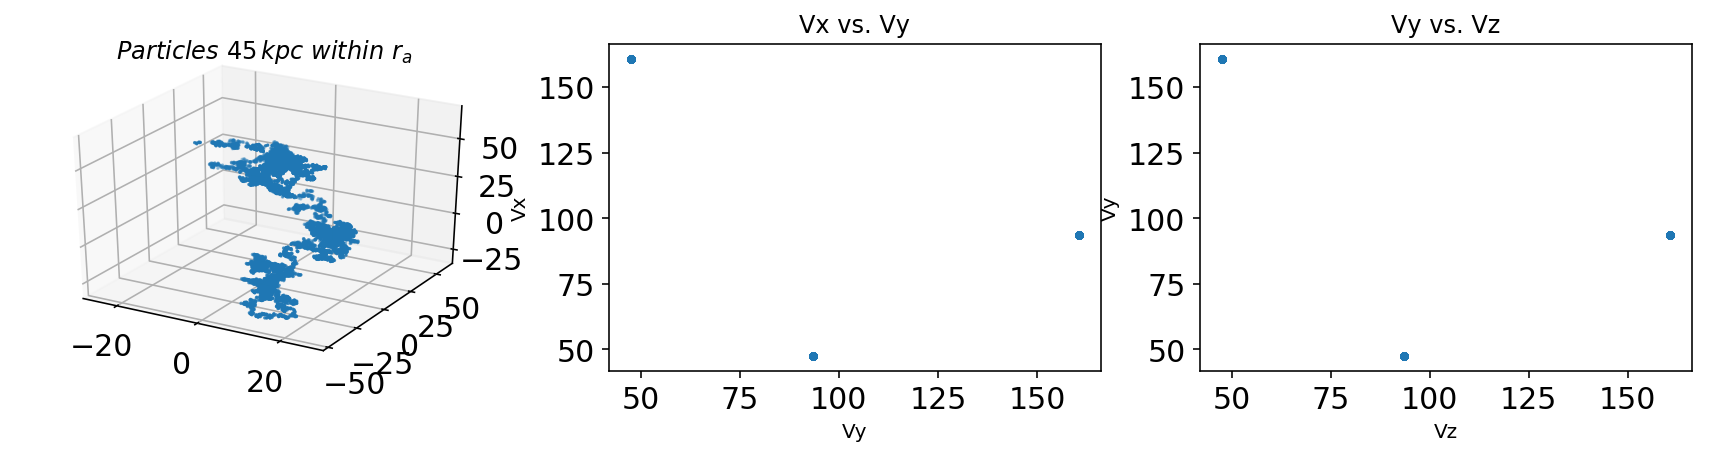

In [15]:
i = 0
while i<3:
    Pf1, Vf1 = Nleapfrog(Pi,Vi,x0=x0[i],v0=v0[i],tn=tn[-1])
    Pf1 = Pf1.reshape(3,len(Vx))
    Vf1 = Vf1.reshape(3,len(Vx))
    Pff,Vff,Mf = sphere(Pf1,Vf1,Mass,rad=45.,cent=apo[i])
    l = len(Pff)/3
    Pff = Pff.reshape(l,3)
    Vff = Vff.reshape(l,3)
    Mass_f = np.sum(Mf)
    X = Pff[:,0]
    Y = Pff[:,1]
    Z = Pff[:,2]
    VX = Vff[:,0]
    VY = Vff[:,1]
    VZ = Vff[:,2]
    print "The mass fraction within the sphere is:",Mass_f/np.sum(Mass)
    fig = plt.figure(figsize=(15,3))
    ax = fig.add_subplot(131, projection='3d')
    frame1 = fig.add_subplot(132)
    frame2 = fig.add_subplot(133)
    ax.scatter(X, Y, Z,marker='.',s=2)
    frame1.plot(VY,VX,'.')
    frame2.plot(VZ,VY,'.')
    ax.set_title(r"$Particles \ 45\,kpc \ within \ r_a$")
    frame1.set_title("Vx vs. Vy")
    frame1.set_xlabel("Vy")
    frame1.set_ylabel("Vx")
    frame2.set_title("Vy vs. Vz")
    frame2.set_xlabel("Vz")
    frame2.set_ylabel("Vy")
    show()              
    i+=1        
    

The mass fraction within the sphere is: 0.950534500785


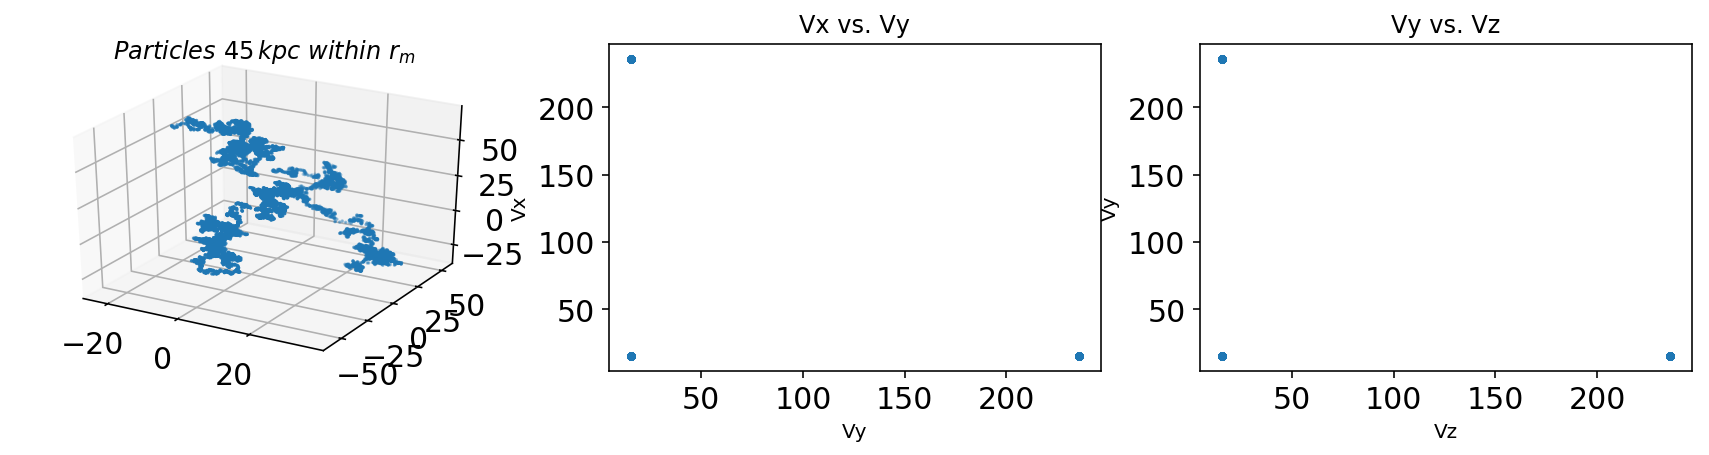

The mass fraction within the sphere is: 0.4767999846


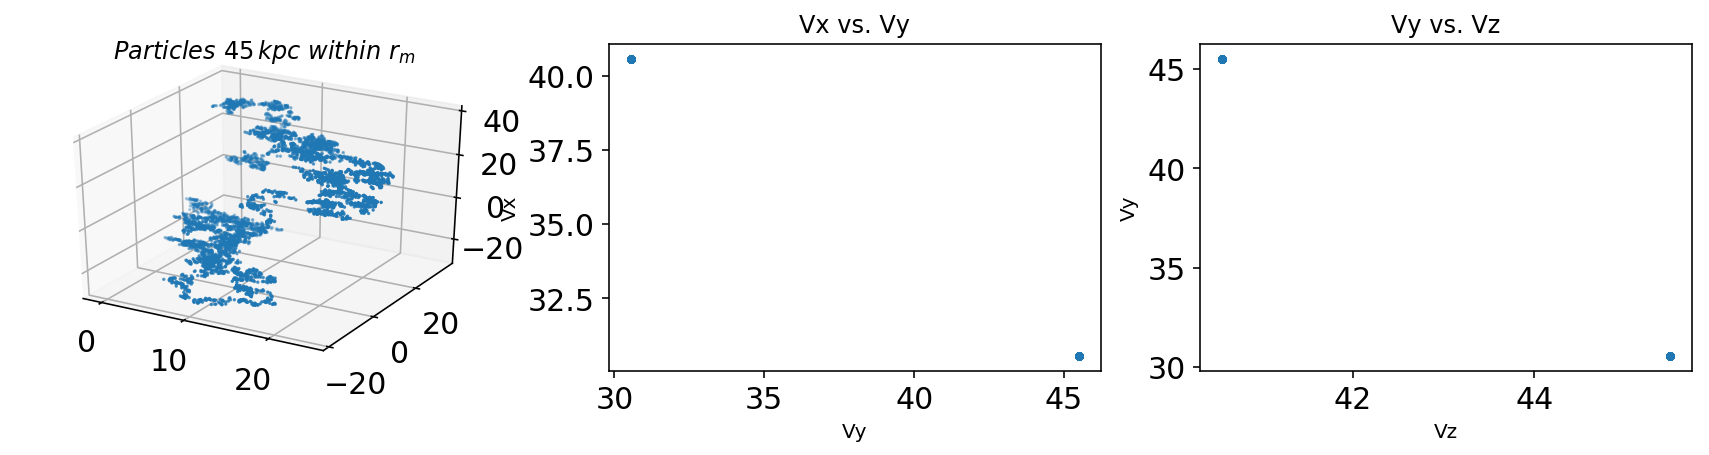

The mass fraction within the sphere is: 0.537352761448


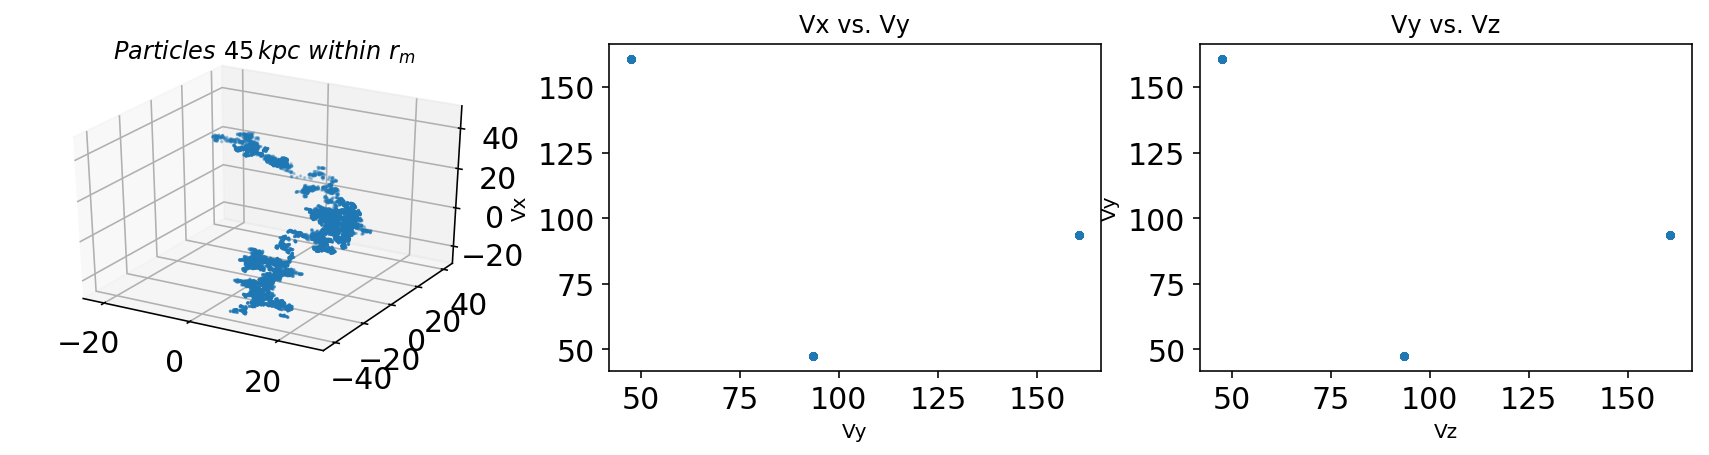

In [16]:
i = 0
while i<3:
    Pf1, Vf1 = Nleapfrog(Pi,Vi,x0=x0[i],v0=v0[i],tn=tn[-1])
    Pf1 = Pf1.reshape(3,len(Vx))
    Vf1 = Vf1.reshape(3,len(Vx))
    Pff,Vff,Mf = sphere(Pf1,Vf1,Mass,rad=45.,cent=cent[i])
    l = len(Pff)/3
    Pff = Pff.reshape(l,3)
    Vff = Vff.reshape(l,3)
    Mass_f = np.sum(Mf)
    X = Pff[:,0]
    Y = Pff[:,1]
    Z = Pff[:,2]
    VX = Vff[:,0]
    VY = Vff[:,1]
    VZ = Vff[:,2]
    print "The mass fraction within the sphere is:",Mass_f/np.sum(Mass)
    fig = plt.figure(figsize=(15,3))
    ax = fig.add_subplot(131, projection='3d')
    frame1 = fig.add_subplot(132)
    frame2 = fig.add_subplot(133)
    ax.scatter(X, Y, Z,marker='.',s=2)
    frame1.plot(VY,VX,'.')
    frame2.plot(VZ,VY,'.')
    ax.set_title(r"$Particles \ 45\,kpc \ within \ r_m$")
    frame1.set_title("Vx vs. Vy")
    frame1.set_xlabel("Vy")
    frame1.set_ylabel("Vx")
    frame2.set_title("Vy vs. Vz")
    frame2.set_xlabel("Vz")
    frame2.set_ylabel("Vy")
    show()              
    i+=1        
    

The mass fraction within the sphere is: 0.51562447453


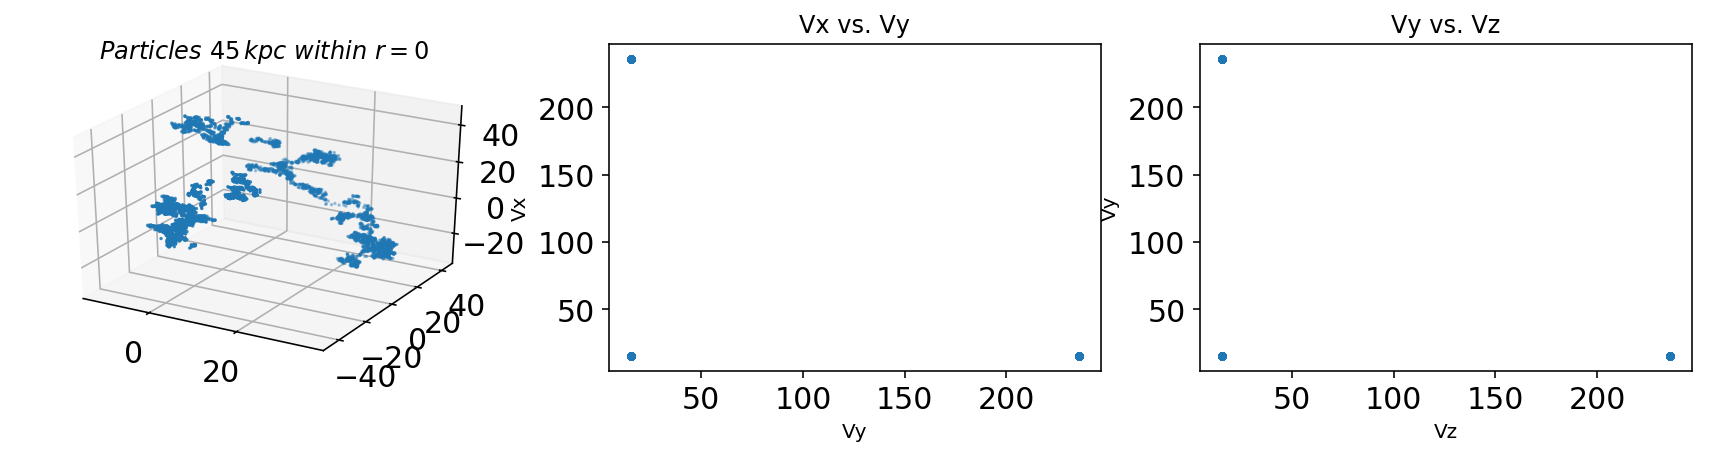

The mass fraction within the sphere is: 0.465630685699


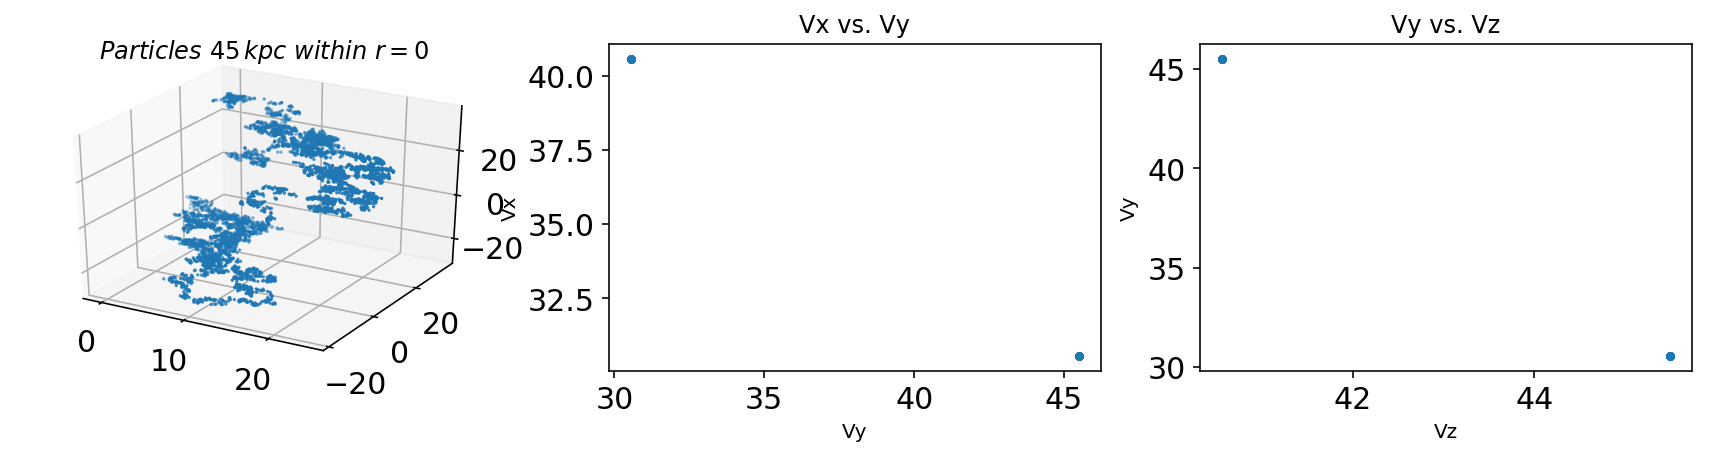

The mass fraction within the sphere is: 0.499987051179


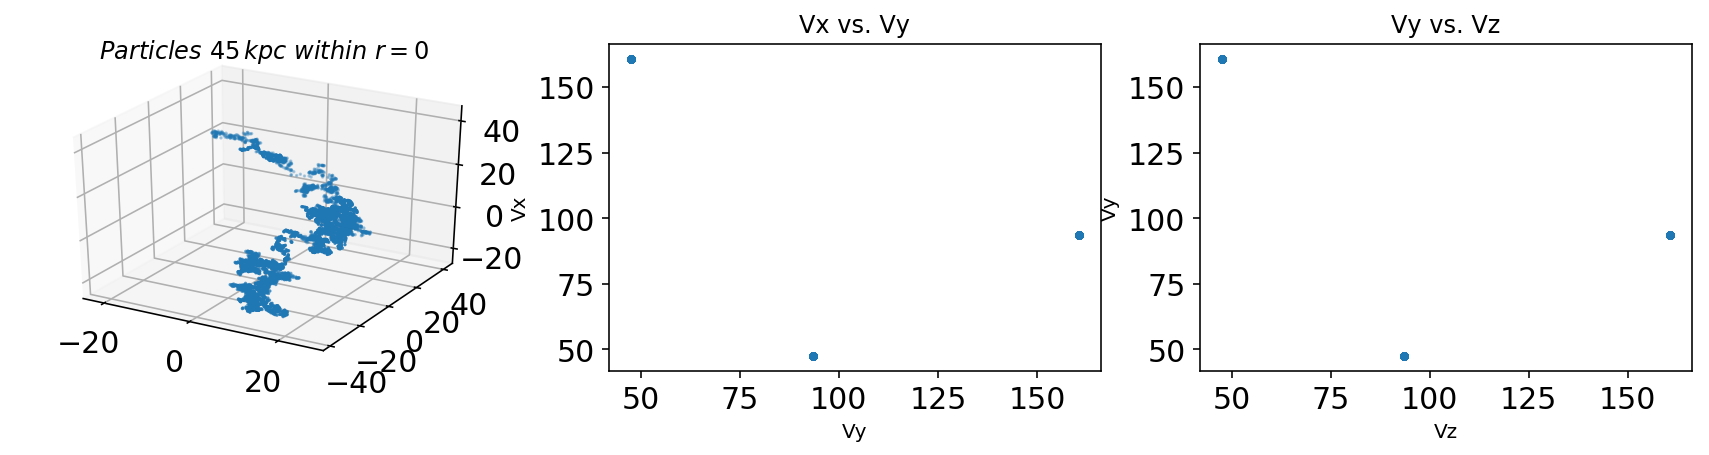

In [17]:
i = 0
while i<3:
    Pf1, Vf1 = Nleapfrog(Pi,Vi,x0=x0[i],v0=v0[i],tn=tn[-1])
    Pf1 = Pf1.reshape(3,len(Vx))
    Vf1 = Vf1.reshape(3,len(Vx))
    Pff,Vff,Mf = sphere(Pf1,Vf1,Mass,rad=45.)
    l = len(Pff)/3
    Pff = Pff.reshape(l,3)
    Vff = Vff.reshape(l,3)
    Mass_f = np.sum(Mf)
    X = Pff[:,0]
    Y = Pff[:,1]
    Z = Pff[:,2]
    VX = Vff[:,0]
    VY = Vff[:,1]
    VZ = Vff[:,2]
    print "The mass fraction within the sphere is:",Mass_f/np.sum(Mass)
    fig = plt.figure(figsize=(15,3))
    ax = fig.add_subplot(131, projection='3d')
    frame1 = fig.add_subplot(132)
    frame2 = fig.add_subplot(133)
    ax.scatter(X, Y, Z,marker='.',s=2)
    frame1.plot(VY,VX,'.')
    frame2.plot(VZ,VY,'.')
    ax.set_title(r"$Particles \ 45\,kpc \ within \ r=0$")
    frame1.set_title("Vx vs. Vy")
    frame1.set_xlabel("Vy")
    frame1.set_ylabel("Vx")
    frame2.set_title("Vy vs. Vz")
    frame2.set_xlabel("Vz")
    frame2.set_ylabel("Vy")
    show()              
    i+=1        
    